In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option("display.max_columns", 200)

### Getting the data in a pandas dataframe

In [136]:
df = pd.read_csv("Airbnb_Open_Data.csv")

/tmp/ipykernel_4482/3424017332.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv")


In [137]:
df.shape

(102599, 26)

In [138]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


### Removing unnecssary columns (Did it through the explanation that was given in the metadata and also features that were providing same value, e.g. 'country' and 'country_code')

In [139]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [140]:
df = df[['NAME','host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'country', 'instant_bookable', 
       'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365']]

In [141]:
df.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,United States,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,United States,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,United States,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,United States,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,United States,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            102349 non-null  object 
 1   host_identity_verified          102310 non-null  object 
 2   host name                       102193 non-null  object 
 3   neighbourhood group             102570 non-null  object 
 4   neighbourhood                   102583 non-null  object 
 5   country                         102067 non-null  object 
 6   instant_bookable                102494 non-null  object 
 7   cancellation_policy             102523 non-null  object 
 8   room type                       102599 non-null  object 
 9   Construction year               102385 non-null  float64
 10  price                           102352 non-null  object 
 11  service fee                     102326 non-null  object 
 12  minimum nights  

#### As we can see here there are a lot of variables with the object datatype and also a lot of the varibles present have missing values in them. Let's explore that.

In [143]:
# Renaming columns for consistency and better readebility
df = df.rename(columns={'NAME':'name', 
           'host name':'host_name', 
           'neighbourhood group':'neighbourhood_group', 
           'room type':'room_type',
           'Construction year':'construction_year',
           'service fee':'service_fee',
           'minimum nights':'minimum_nights',
           'number of reviews':'number_of_reviews',
           'last review':'last_review',
           'reviews per month':'reviews_per_month',
           'review rate number':'review_rate_number',
           'calculated host listings count':'calculated_host_listings_count',
           'availability 365':'availability_365'})

In [144]:
df.isna().sum()

name                                250
host_identity_verified              289
host_name                           406
neighbourhood_group                  29
neighbourhood                        16
country                             532
instant_bookable                    105
cancellation_policy                  76
room_type                             0
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      409
number_of_reviews                   183
last_review                       15893
reviews_per_month                 15879
review_rate_number                  326
calculated_host_listings_count      319
availability_365                    448
dtype: int64

- 'last_review' and 'review_per_month' have almost 15k missing values out of the total - 102599 (almost 6%)
- also almost all the variables have some or the other values missing.

#### Tackling the missing values

- We divide the variables into categorical and numerical for easier working.

##### Categorical Features (Fill with Mode / Drop if Excessive)

- **name** (250 missing) → Replace with 'blank'
- **host_identity_verified** (289 missing) → Fill with mode (most frequent value)
- **host_name** (406 missing) → Replace with 'blank'
- **neighbourhood_group** (29 missing) → Fill with mode
- **neighbourhood** (16 missing) → Fill with mode
- **country** (532 missing) → Drop (likely redundant if all rows are from one country)
- **instant_bookable** (105 missing) → Fill with mode
- **cancellation_policy** (76 missing) → Fill with mode
- **room_type** (0 missing) → No action needed


Lets first fix "price" so it is a numerical value not an object (str).

In [145]:
df['price'] = df['price'].str.replace(r'[$ ,]', '',regex=True)
df['service_fee'] = df['service_fee'].str.replace(r'[$ ,]', '',regex=True)

In [146]:
df['price'] = df['price'].fillna(0).astype(int)
df['service_fee'] = df['service_fee'].fillna(0).astype(int)

In [147]:
df.drop(columns=['country'], inplace=True)

In [148]:
impute_blank = ['name', 'host_name']
for i in impute_blank:
    df[i] = df[i].fillna('blank')

Now lets fill the null values with the *Mode* of that specific column. 

In [149]:
fill_na_cat_columns = ['host_identity_verified','neighbourhood_group', 'neighbourhood','instant_bookable','cancellation_policy']
for i in fill_na_cat_columns:
    df[i] = df[i].fillna(df[i].mode()[0])

/tmp/ipykernel_4482/2433378604.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].fillna(df[i].mode()[0])


##### Numerical Features (Fill with Median / Drop if Excessive)

- **construction_year** (214 missing) → Fill with median (assuming missing values are errors)
- **price** (247 missing) → Fill with median (critical column)
- **service_fee** (273 missing) → Fill with median
- **minimum_nights** (409 missing) → Fill with median
- **number_of_reviews** (183 missing) → Fill with median
- **last_review** (15,893 missing) → Drop (too many missing values)
- **reviews_per_month** (15,879 missing) → Fill with 0 (if missing, assume no reviews)
- **review_rate_number** (326 missing) → Fill with median
- **calculated_host_listings_count** (319 missing) → Fill with median
- **availability_365** (448 missing) → Fill with median

In [150]:
df = df.drop(['last_review'], axis=1)

In [151]:
fill_na_num_cols = ['construction_year', 'price', 'service_fee', 'minimum_nights',
                  'number_of_reviews', 'review_rate_number', 'calculated_host_listings_count',
                  'availability_365']
for i in fill_na_num_cols:
    df[i] = df[i].fillna(df[i].median())

In [152]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [153]:
df.isna().sum()

name                              0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Lets now check of inconsistencies in our dataset with respect to object variables (spellings, duplicates, etc)

In [154]:
columns = ['host_identity_verified', 'neighbourhood_group', 'neighbourhood',
       'instant_bookable', 'cancellation_policy', 'room_type']

In [155]:
for col in columns:
    unique_val = df[col].unique()
    print(f"Unique values in '{col}':'{unique_val}'")

Unique values in 'host_identity_verified':'['unconfirmed' 'verified']'
Unique values in 'neighbourhood_group':'['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' 'Staten Island'
 'Bronx']'
Unique values in 'neighbourhood':'['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'G

As we can see there are some issues in the 'neghibourhood_group' variable. Let's fix it by replacing it with the right values.

In [156]:
df['neighbourhood_group'] = df['neighbourhood_group'].str.replace("brookln","Brooklyn")
df['neighbourhood_group'] = df['neighbourhood_group'].str.replace("manhatan","Manhattan")

In [157]:
print(f"Unique values in 'neighbourhood_group':'{df['neighbourhood_group'].unique()}'")

Unique values in 'neighbourhood_group':'['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']'


 We can see that all the missing / NA values are fixed and the repeated value in 'neighbourhood_group' is also fixed. From here on we move towards Univariate analysis of our dataset and do some more cleaning as and when necessary.

#### More indepth cleaning

##### Consistency check

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            102599 non-null  object 
 1   host_identity_verified          102599 non-null  object 
 2   host_name                       102599 non-null  object 
 3   neighbourhood_group             102599 non-null  object 
 4   neighbourhood                   102599 non-null  object 
 5   instant_bookable                102599 non-null  bool   
 6   cancellation_policy             102599 non-null  object 
 7   room_type                       102599 non-null  object 
 8   construction_year               102599 non-null  float64
 9   price                           102599 non-null  int64  
 10  service_fee                     102599 non-null  int64  
 11  minimum_nights                  102599 non-null  float64
 12  number_of_review

In [159]:
df.head()

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,966,193,10.0,9.0,0.21,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,142,28,30.0,45.0,0.38,4.0,2.0,228.0
2,THE VILLAGE OF HARLEM....NEW YORK !,unconfirmed,Elise,Manhattan,Harlem,True,flexible,Private room,2005.0,620,124,3.0,0.0,0.00,5.0,1.0,352.0
3,blank,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,368,74,30.0,270.0,4.64,4.0,1.0,322.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,204,41,10.0,9.0,0.10,3.0,1.0,289.0


#### Let's Start!

##### Numerical Variables

We start with getting the basic stats out of are variables (count, mean, std, IQR) - specifically for the numerical variables.

In [160]:
numerical_cols = ['construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365']

In [161]:
df.describe()

,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000
mean,2012.486447,623.788185,124.694247,8.115371,27.447207,1.161368,3.278219,7.915038,140.936179
std,5.759583,332.686420,66.549843,30.494537,49.472332,1.680924,1.282711,32.170972,135.171770
min,2003.000000,0.000000,0.000000,-1223.000000,0.000000,0.000000,1.000000,1.000000,-10.000000
25%,2008.000000,337.000000,67.000000,2.000000,1.000000,0.090000,2.000000,1.000000,3.000000
50%,2012.000000,623.000000,124.000000,3.000000,7.000000,0.480000,3.000000,1.000000,96.000000
75%,2017.000000,912.000000,182.000000,5.000000,30.000000,1.710000,4.000000,2.000000,268.000000
max,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


##### Insights : 
- **construction_year** : Looks clean enough, has values ranging from 2003 till 2022.
- **price** : Seems to have a little problem as the minimum is 0 and nobody would give away their home for free so we will have to dig in.
- **service_fee** : Similar to price there are values that are 0 in the dataset.

(Reason for 0 values - Data entry errors, Data collection issues, Promotional pricing, etc)

- **minimum_nights** : Way off the normal structure, has negative values in it (impossible event). Skews the data and reduces the information output. Need to check entries with negative values.
- **number_of_reviews** : Looks okay, visualization might shed some more light on this. (Can see the outliers from max values.)
- **reviews_per_month** : Same situation as 'number_of_reviews'.
- **calculated_host_listings_count** : Same situation as 'number_of_reviews'.
- **availability_365** : This is similar to 'minimum_nights' - negative values, skwed data.

##### Visualization

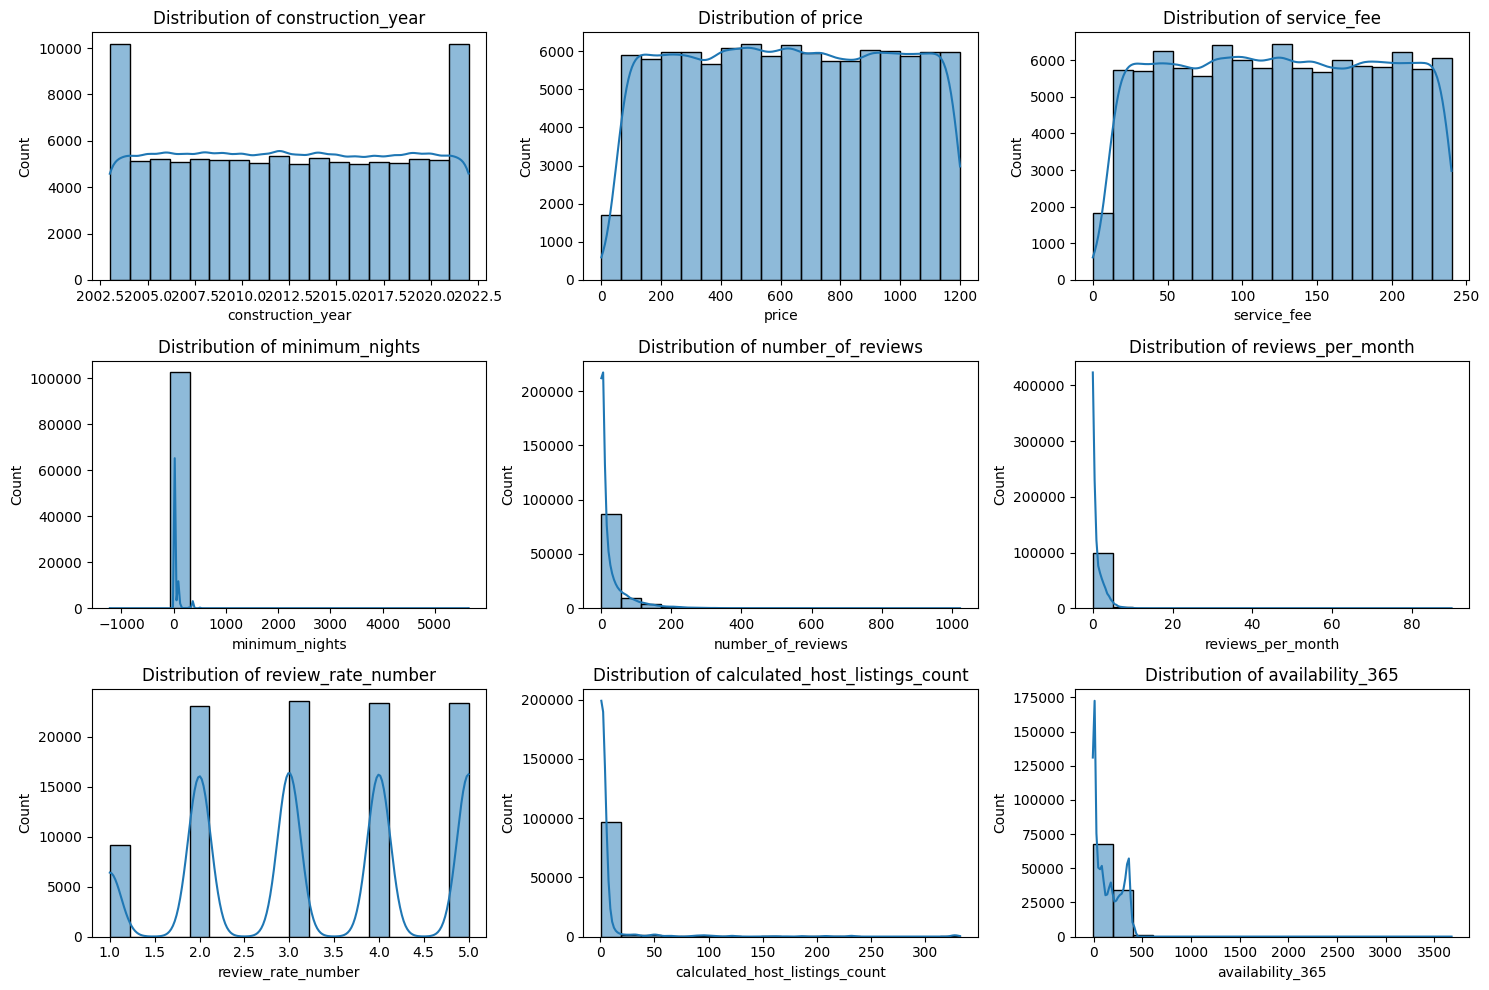

In [162]:
plt.figure(figsize=(15,10))

for i, var in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df[var], bins='sturges',kde=True)
    plt.title(f'Distribution of {var}')  

plt.tight_layout()
plt.show()

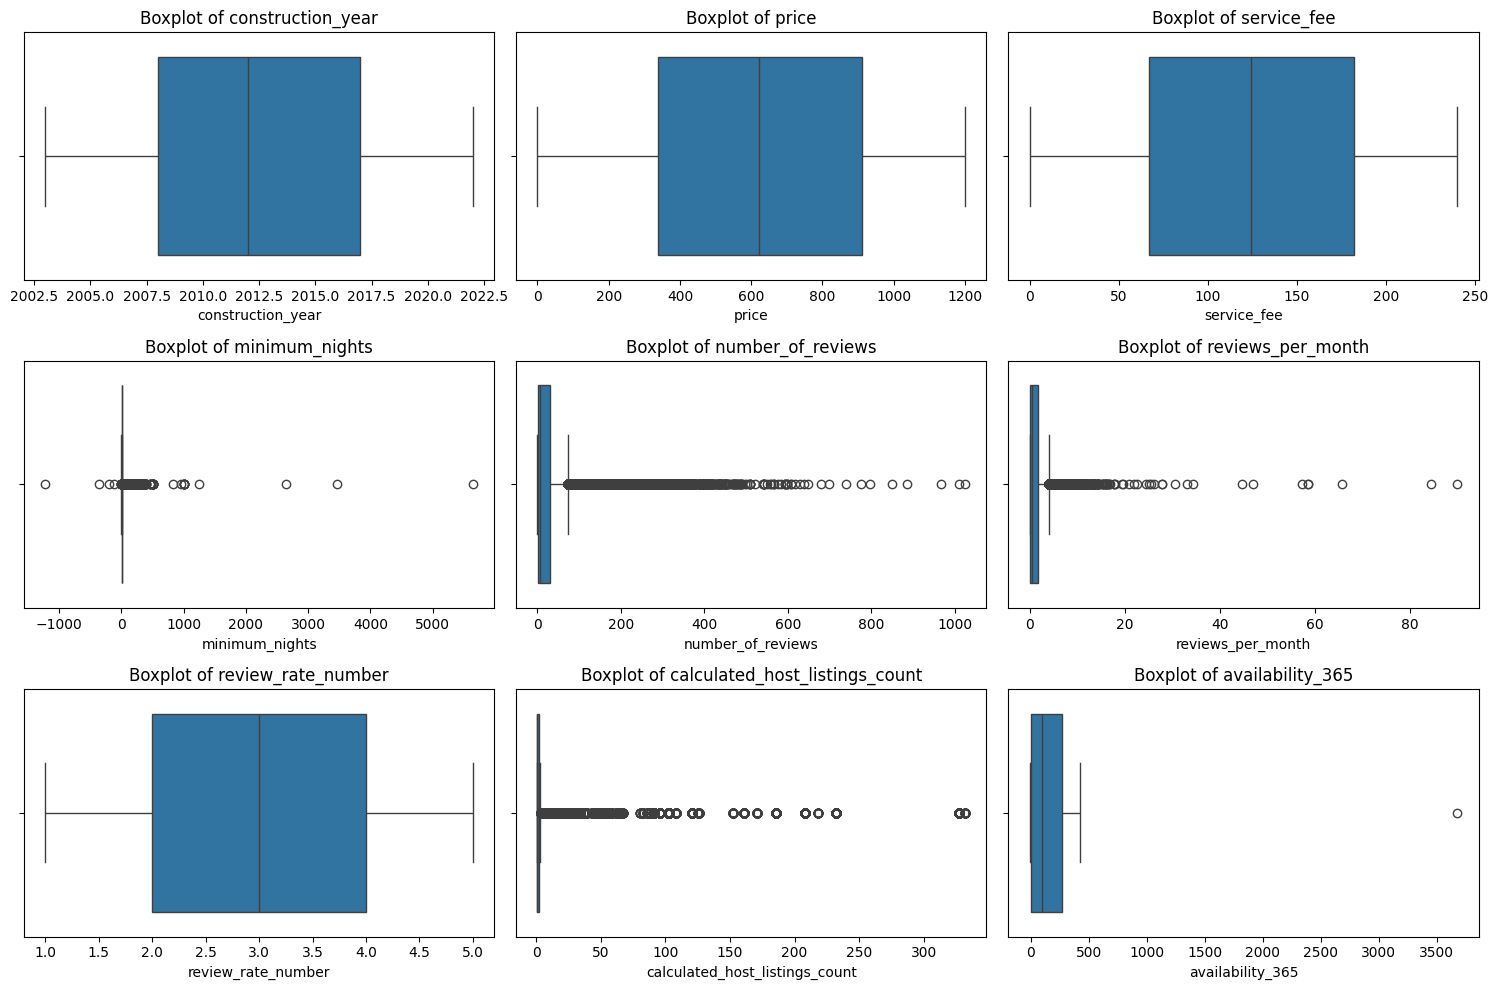

In [163]:
plt.figure(figsize=(15,10))

for i, var in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df, x=var)
    plt.title(f'Boxplot of {var}')  

plt.tight_layout()
plt.show()

- Highly Skewed Distributions (e.g., number_of_reviews, reviews_per_month, availability_365) → These need transformations.
- Extreme Outliers (e.g., minimum_nights has negative values and extreme high values) → Requires outlier removal.
- Discrete Values Displayed as Continuous (e.g., review_rate_number has distinct peaks, even construction_year and calculated host listing counts) → Should be treated as categorical.
- Uniform Distribution in Some Columns (e.g., price, service_fee) → Might be due to incorrect bin sizes or data scaling.

Lot of cleaning required for a few of these variables as there are still a lot of inconsistencies. Let's start with removing incorrect data and then moving on to outlier removal.

In [164]:
# Lets check the price and service_fee variable
df.loc[(df['price'] == 0) | (df['service_fee'] == 0)]

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
15,West Village Nest - Superhost,verified,Daniel,Manhattan,West Village,True,flexible,Entire home/apt,2018.0,578,0,90.0,27.0,0.22,3.0,1.0,100.0
16,Only 2 stops to Manhattan studio,unconfirmed,Heather,Brooklyn,Williamsburg,False,moderate,Entire home/apt,2009.0,778,0,2.0,148.0,1.20,3.0,1.0,197.0
17,Perfect for Your Parents + Garden,verified,Ryan,Brooklyn,Fort Greene,False,flexible,Entire home/apt,2006.0,656,0,2.0,198.0,1.72,5.0,1.0,96.0
18,Chelsea Perfect,verified,Alberta,Manhattan,Chelsea,False,moderate,Private room,2008.0,460,0,1.0,260.0,2.12,3.0,1.0,325.0
19,Hip Historic Brownstone Apartment with Backyard,unconfirmed,Martin,Brooklyn,Crown Heights,False,moderate,Entire home/apt,2004.0,1095,0,3.0,53.0,4.44,5.0,1.0,345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,Cozy bright room near Prospect Park,unconfirmed,Mariam,Brooklyn,Flatbush,True,moderate,Private room,2012.0,696,0,7.0,12.0,0.44,5.0,1.0,0.0
102054,Private Bedroom with Amazing Rooftop View,verified,Trey,Brooklyn,Bushwick,False,flexible,Private room,2012.0,909,0,1.0,19.0,0.72,3.0,2.0,0.0
102055,Pretty Brooklyn One-Bedroom for 2 to 4 people,verified,Michael,Brooklyn,Bedford-Stuyvesant,True,moderate,Entire home/apt,2012.0,387,0,2.0,50.0,3.12,4.0,2.0,235.0
102056,Room & private bathroom in historic Harlem,unconfirmed,Shireen,Manhattan,Harlem,True,strict,Private room,2012.0,848,0,2.0,0.0,0.00,1.0,1.0,0.0


In [165]:
price_mean = df['price'].mean()
service_fee_mean = df['service_fee'].mean()
df['price'] = df['price'].replace(0, price_mean)
df['service_fee'] = df['service_fee'].replace(0, service_fee_mean)

Imputing them with the mean makes the most sense as its almost an uniform distribution and it'll help with our analysis later on.

In [166]:
# minimum_nights variable
df.loc[(df['minimum_nights'] <= 0) | (df['minimum_nights'] > 90)]

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
62,blank,unconfirmed,George,Manhattan,Chelsea,True,moderate,Entire home/apt,2004.0,779.0,156.0,180.0,5.0,0.12,2.0,1.0,96.0
166,* Spacious GARDEN Park Slope Duplex* 6 people max,verified,Nicole,Brooklyn,Gowanus,False,strict,Entire home/apt,2021.0,374.0,75.0,144.0,80.0,0.00,2.0,1.0,52.0
167,Convenient cozy cheap apt Manhattan,unconfirmed,Agata,Manhattan,Harlem,False,flexible,Entire home/apt,2011.0,375.0,75.0,371.0,2.0,0.00,4.0,1.0,70.0
168,Parlor Room In Victorian Townhouse,unconfirmed,Heather,Manhattan,Clinton Hill,True,strict,Private room,2004.0,925.0,185.0,149.0,294.0,0.00,3.0,3.0,311.0
169,House On Henry (2nd FLR Suite),unconfirmed,James,Brooklyn,Carroll Gardens,False,moderate,Entire home/apt,2008.0,842.0,168.0,273.0,150.0,1.40,5.0,3.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101796,Small Cozy Room in Herald Square,verified,Chelsea,Manhattan,Midtown,False,moderate,Private room,2019.0,449.0,90.0,300.0,1.0,0.04,1.0,1.0,89.0
101842,Beautiful duplex in Gramercy,unconfirmed,Pilar,Manhattan,Gramercy,True,strict,Entire home/apt,2013.0,1120.0,224.0,120.0,2.0,0.08,2.0,1.0,167.0
101980,NYU/E.Village Cafes & Bars*6 month $3500/mo,unconfirmed,Lisa,Manhattan,East Village,False,strict,Entire home/apt,2013.0,156.0,31.0,180.0,15.0,0.56,3.0,1.0,332.0
102468,"Clean, Cozy Home in Perfect Park Slope Location",unconfirmed,Young Jean,Brooklyn,Park Slope,True,strict,Entire home/apt,2013.0,678.0,136.0,120.0,0.0,0.00,5.0,1.0,0.0


In [167]:
# Upper is (Q3 + 1.5 * IQR)
df['minimum_nights'] = df['minimum_nights'].clip(lower=1)

Getting this to work between 1 and the upper limit so that we have our distribution to work with.

In [168]:
# availability_365 variable
df.loc[df['availability_365'] < 0]

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
139,FLAT MACDONOUGH,unconfirmed,Frederick,Brooklyn,Bedford-Stuyvesant,False,flexible,Entire home/apt,2010.0,593.0,119.0,3.0,227.0,2.09,5.0,2.0,-10.0
142,"Sun-drenched, artsy modernist 1 BDRM duplex",unconfirmed,Kellan,Brooklyn,Williamsburg,True,moderate,Entire home/apt,2004.0,658.0,132.0,3.0,10.0,0.10,5.0,1.0,-2.0
170,New York room with a view,unconfirmed,Dexter,Staten Island,St. George,True,strict,Private room,2003.0,1015.0,203.0,131.0,166.0,1.66,4.0,1.0,-1.0
236,blank,unconfirmed,Cameron,Manhattan,East Harlem,False,flexible,Entire home/apt,2020.0,1052.0,210.0,28.0,183.0,1.83,2.0,2.0,-6.0
251,B NYC Staten Alternative...,unconfirmed,Fowler,Staten Island,Tompkinsville,True,strict,Private room,2017.0,784.0,157.0,2.0,147.0,0.00,3.0,6.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86735,Comfortable 2 BR in East Village/Cooper Square,unconfirmed,Cooper,Manhattan,East Village,True,moderate,Entire home/apt,2005.0,335.0,67.0,3.0,27.0,0.76,5.0,1.0,-4.0
86764,"Beautiful hip location, with a light of sunshine.",verified,Noemi,Queens,Ridgewood,False,flexible,Entire home/apt,2009.0,606.0,121.0,28.0,1.0,0.10,4.0,1.0,-2.0
86790,Beautiful Quiet Bedroom near City College,unconfirmed,Erika,Manhattan,Harlem,False,strict,Private room,2017.0,948.0,190.0,2.0,0.0,0.00,4.0,3.0,-7.0
86853,West Chelsea 1 bedroom 2 bathroom outdoor space.,unconfirmed,Alison,Manhattan,Chelsea,True,flexible,Entire home/apt,2004.0,651.0,130.0,14.0,0.0,0.00,5.0,1.0,-7.0


In [169]:
df['availability_365'] = df['availability_365'].clip(lower=0)

For -ve values we plan to clip them and put 0 in their place. We do this because the entries are less and this does not lose much information.

In [170]:
df.loc[df['availability_365'] > 365]

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
5,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Manhattan,Murray Hill,True,flexible,Entire home/apt,2013.0,577.0,115.0,3.0,74.0,0.59,3.0,1.0,374.0
9,Cozy Clean Guest Room - Family Apt,unconfirmed,Carl,Manhattan,Upper West Side,False,strict,Private room,2015.0,291.0,58.0,2.0,118.0,0.99,5.0,1.0,375.0
25,"MAISON DES SIRENES1,bohemian apartment",unconfirmed,Miranda,Brooklyn,Bedford-Stuyvesant,False,strict,Entire home/apt,2006.0,1175.0,235.0,2.0,88.0,0.73,4.0,2.0,372.0
33,Loft in Williamsburg Area w/ Roof,unconfirmed,John,Brooklyn,Greenpoint,False,moderate,Private room,2007.0,858.0,172.0,4.0,197.0,1.65,3.0,3.0,383.0
34,back room/bunk beds,verified,Alfred,Manhattan,Harlem,False,strict,Private room,2021.0,545.0,109.0,3.0,273.0,2.37,3.0,3.0,411.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102582,Private room in the best part of BK,verified,Brad,Brooklyn,Crown Heights,False,flexible,Private room,2011.0,516.0,103.0,7.0,49.0,1.01,2.0,1.0,425.0
102584,2 block walk from the beach in NYC,verified,Vladimir,Queens,Arverne,False,strict,Entire home/apt,2010.0,566.0,113.0,2.0,89.0,1.82,2.0,1.0,394.0
102588,"Loft Space for Events, Meetings & Shoots",unconfirmed,Kalin,Manhattan,Flatiron District,True,flexible,Entire home/apt,2016.0,618.0,124.0,1.0,177.0,3.78,4.0,1.0,410.0
102595,Best Location near Columbia U,unconfirmed,Mifan,Manhattan,Morningside Heights,True,moderate,Private room,2016.0,837.0,167.0,1.0,1.0,0.02,2.0,2.0,395.0


As the values greater than 365 are almost 2.7k we will impute them using kNN imputer. We don't use mean/median here as it would create a greater bias and also might lose a lot of information.

For kNN we need to scale the variables, convert categorical variables, etc. So for this specific task we will create a copy of our dataset and then later on feed the values back in the original one.

In [171]:
df['availability_365'] = np.where(df['availability_365'] > 365, np.nan, df['availability_365'])

In [172]:
df_imputer = df.copy(deep=True)

In [173]:
df_imputer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            102599 non-null  object 
 1   host_identity_verified          102599 non-null  object 
 2   host_name                       102599 non-null  object 
 3   neighbourhood_group             102599 non-null  object 
 4   neighbourhood                   102599 non-null  object 
 5   instant_bookable                102599 non-null  bool   
 6   cancellation_policy             102599 non-null  object 
 7   room_type                       102599 non-null  object 
 8   construction_year               102599 non-null  float64
 9   price                           102599 non-null  float64
 10  service_fee                     102599 non-null  float64
 11  minimum_nights                  102599 non-null  float64
 12  number_of_review

In [174]:
df_imputer['instant_bookable'] = df_imputer['instant_bookable'].astype(object)

In [175]:
df_imputer = pd.get_dummies(df, columns=['host_identity_verified','neighbourhood_group','instant_bookable','cancellation_policy','room_type'], drop_first=True, dtype=float)

In [176]:
df_imputer.drop(columns=['neighbourhood'], inplace=True)

In [177]:
df_imputer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   name                               102599 non-null  object 
 1   host_name                          102599 non-null  object 
 2   construction_year                  102599 non-null  float64
 3   price                              102599 non-null  float64
 4   service_fee                        102599 non-null  float64
 5   minimum_nights                     102599 non-null  float64
 6   number_of_reviews                  102599 non-null  float64
 7   reviews_per_month                  102599 non-null  float64
 8   review_rate_number                 102599 non-null  float64
 9   calculated_host_listings_count     102599 non-null  float64
 10  availability_365                   99817 non-null   float64
 11  host_identity_verified_verified    1025

In [178]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="distance")
df['availability_365'] = imputer.fit_transform(df_imputer[['availability_365']])

In [179]:
df.loc[df['availability_365'] > 365]

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365


In [180]:
df.loc[df['availability_365'] < 0]

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365


In [181]:
df['availability_365'].isna().sum()

np.int64(0)

Completed the impuation, we will scrutinize the results during the visualization of the variable.

In [182]:
# review_rate_number variable
df['review_rate_number'] = df['review_rate_number'].astype(str)

In [183]:
numerical_cols.remove('review_rate_number')

This variable has only 5 values and should be considered as a categorical variable rather than a numerical one.

In [184]:
# calculated_host_listings_count variable
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].apply(lambda x: "Single-Host" if x == 1 else "Multi-Host")

In [185]:
numerical_cols.remove('calculated_host_listings_count')

This variable had most of the values as 1 and few in [2,3] so we converted into a categorical variable.

In [186]:
bins = [0, 2009, 2016, float('Inf')]
labels = ['Old', 'Moderate', 'New']

df['construction_year'] = pd.cut(df['construction_year'], 
                                 bins=bins,
                                 labels=labels,
                                 right=False)

In [187]:
numerical_cols.remove('construction_year')

In [188]:
df['construction_year'] = df['construction_year'].astype(str)

=> Outlier removal

In [189]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in numerical_cols:
    df = remove_outliers(df, col)

Let's see if what impact we made on the variables after cleaning.

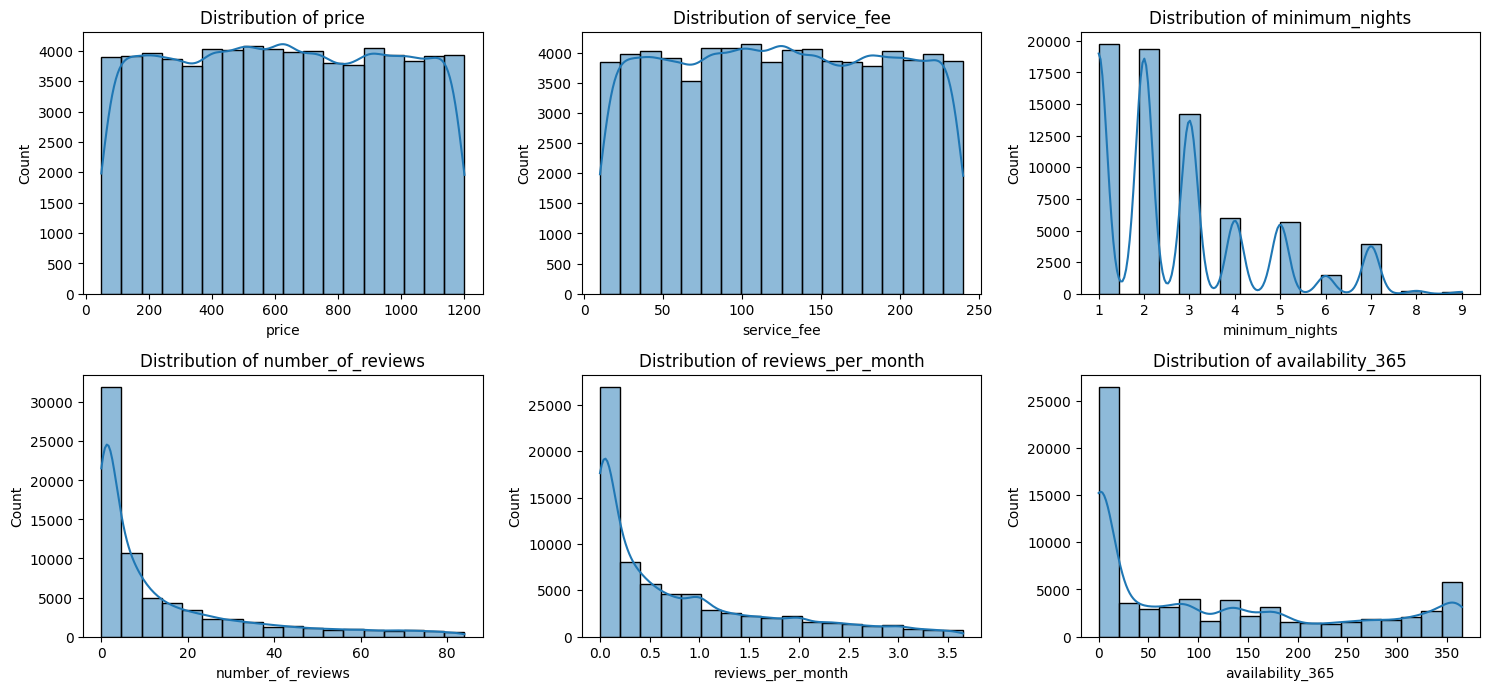

In [190]:
plt.figure(figsize=(15,10))

for i, var in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df[var], bins='sturges',kde=True)
    plt.title(f'Distribution of {var}')  

plt.tight_layout()
plt.show()


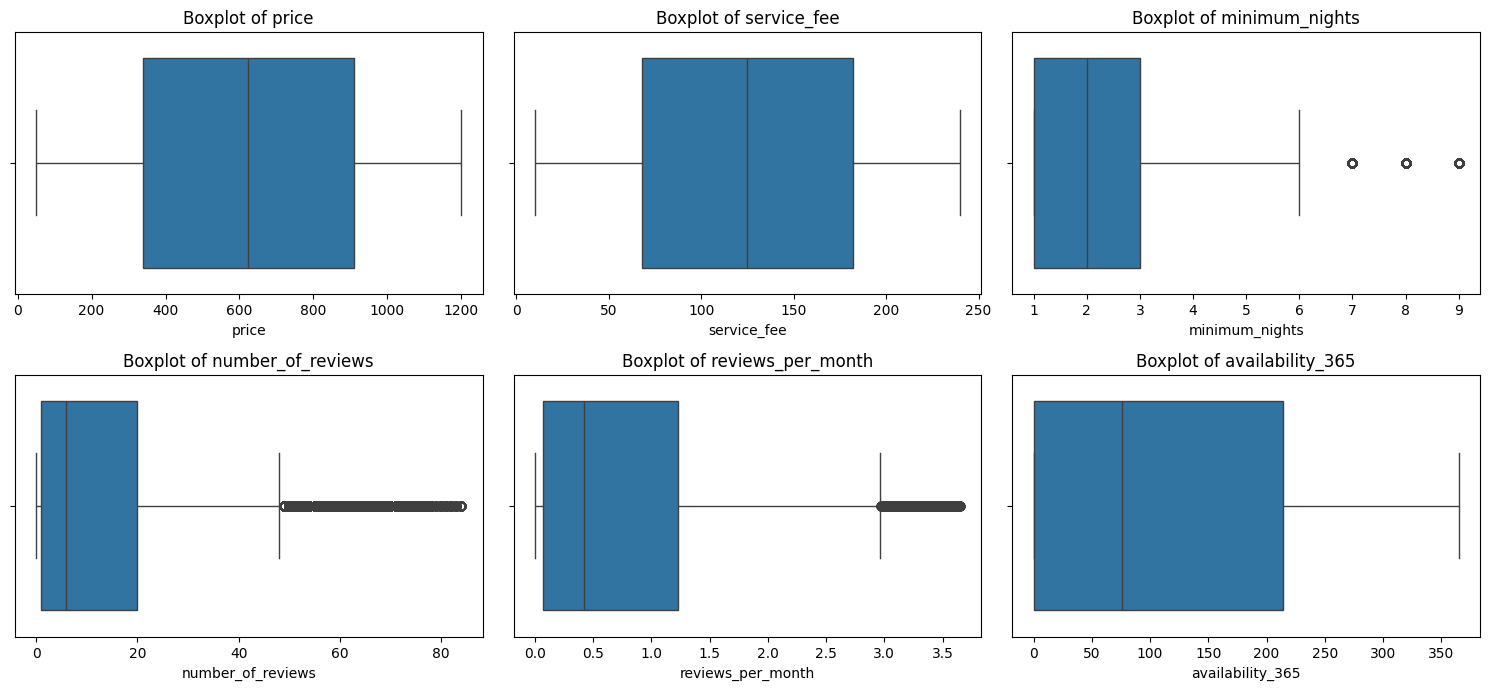

In [191]:
plt.figure(figsize=(15,10))

for i, var in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df, x=var)
    plt.title(f'Boxplot of {var}')  

plt.tight_layout()
plt.show()

One of the reasons IQR did not work in correcting the outliers is that the data is not normally distributed. We might need to consider transformations to them or multiple passes of IQR method might be needed until all the outliers are delt with. We can also change the multiplier from 1.5 to 2/3 to be more aggressive in outlier removal. 

Also removal can also cause to lose information so we need to be carefull with it. More information in the notes.

- For the first 2 variables the data is distributed equally throughout.
- Seeing these results and how the variables are skewed, we need to turn the last 3 variables into categories too.

In [192]:
bins = [0, 15, 30, 45, 60, 80]
labels = ['Very low', 'Low', 'Moderate', 'High', 'Very high']

df['number_of_reviews'] = pd.cut(df['number_of_reviews'], 
                                 bins=bins,
                                 labels=labels,
                                 right=True)

In [193]:
bins = [0, 0.1, 1.5, 3]
labels = ['0', '1', '2']

df['reviews_per_month'] = pd.cut(df['reviews_per_month'], 
                                 bins=bins,
                                 labels=labels,
                                 right=False)

In [194]:
bins = [0, 1, 180, 364, 366]
labels = ['No availability', 'Short-term', 'Medium-term', 'Always available']

df['availability_365'] = pd.cut(df['availability_365'], 
                                 bins=bins,
                                 labels=labels,
                                 right=False)

In [195]:
df['reviews_per_month'] = df['reviews_per_month'].astype(str)
df['availability_365'] = df['availability_365'].astype(str)

In [196]:
numerical_cols.remove('number_of_reviews')
numerical_cols.remove('reviews_per_month')
numerical_cols.remove('availability_365')

In [197]:
df.reset_index(drop=True,inplace=True)

### Univariate Analysis

##### Numerical Variables

In [198]:
df.describe()

,price,service_fee,minimum_nights
count,70760.000000,70760.000000,70760.000000
mean,624.503146,124.871735,2.727883
std,331.131581,66.215716,1.719063
min,50.000000,10.000000,1.000000
25%,340.000000,68.000000,1.000000
50%,623.788185,124.694247,2.000000
75%,911.000000,182.000000,3.000000
max,1200.000000,240.000000,9.000000


##### Insights:
- **price** : Symmetric distribution, High variability (std), slightly right skewed (max is 1200 after 911)

- **service_fee** : Symmetric distribution, not much variability.

- **minimum_nights** : Right skewed, most data under 3 nights (75%)

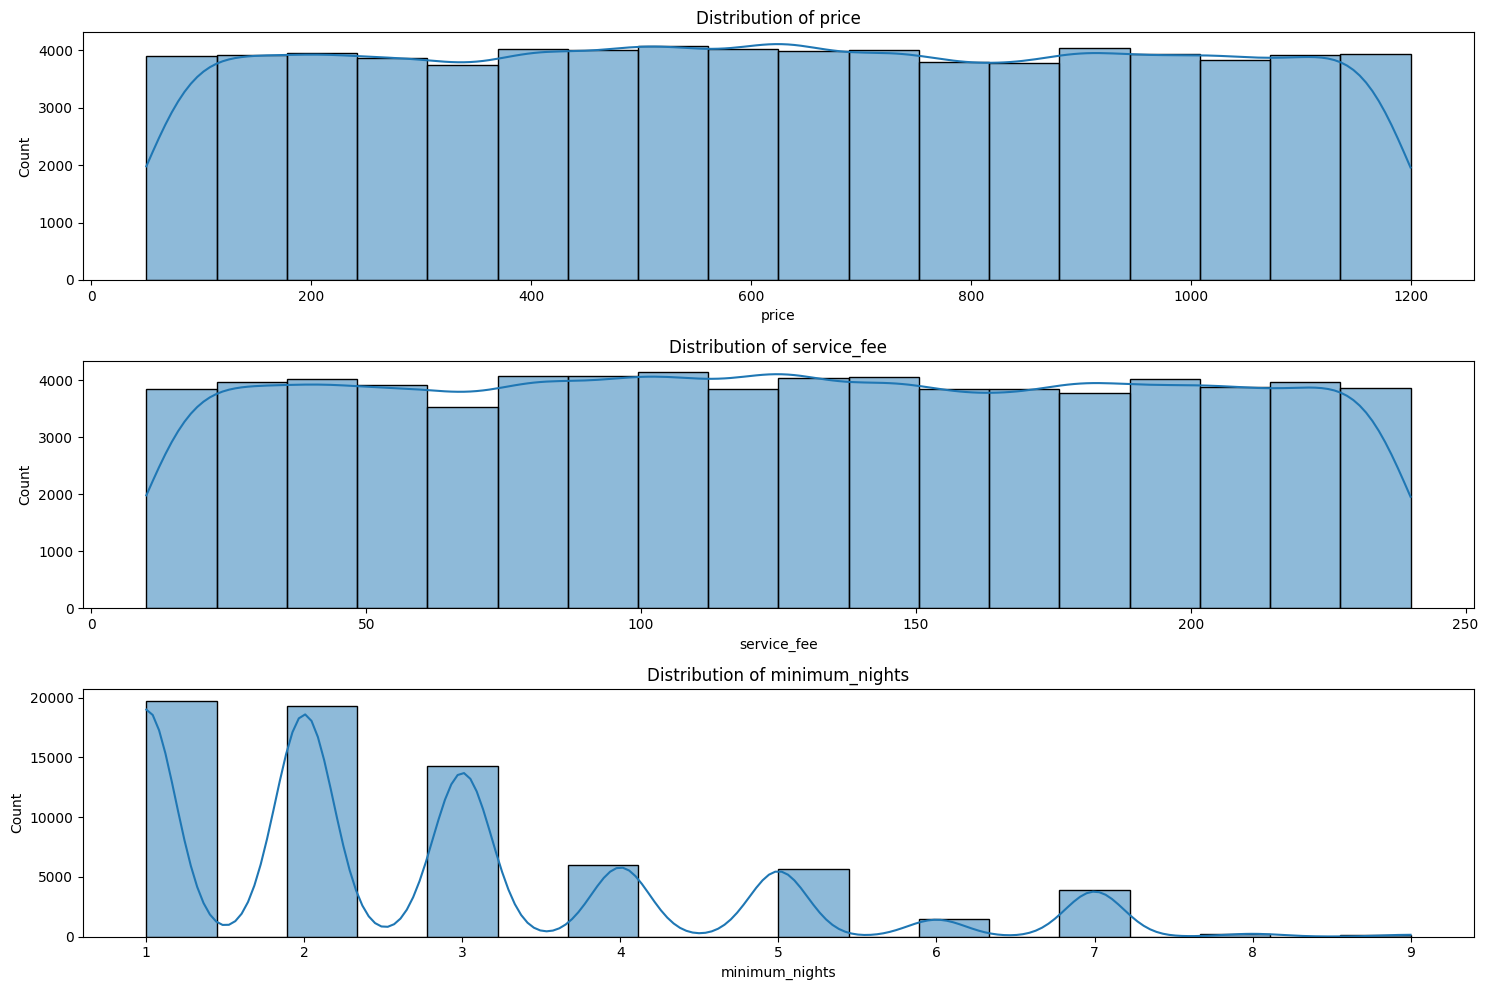

In [199]:
plt.figure(figsize=(15,10))

for i, var in enumerate(numerical_cols):
    plt.subplot(3,1,i+1)
    sns.histplot(df[var], bins='sturges',kde=True)
    plt.title(f'Distribution of {var}')  

plt.tight_layout()
plt.show()

Similar insights as above, not much of a difference.

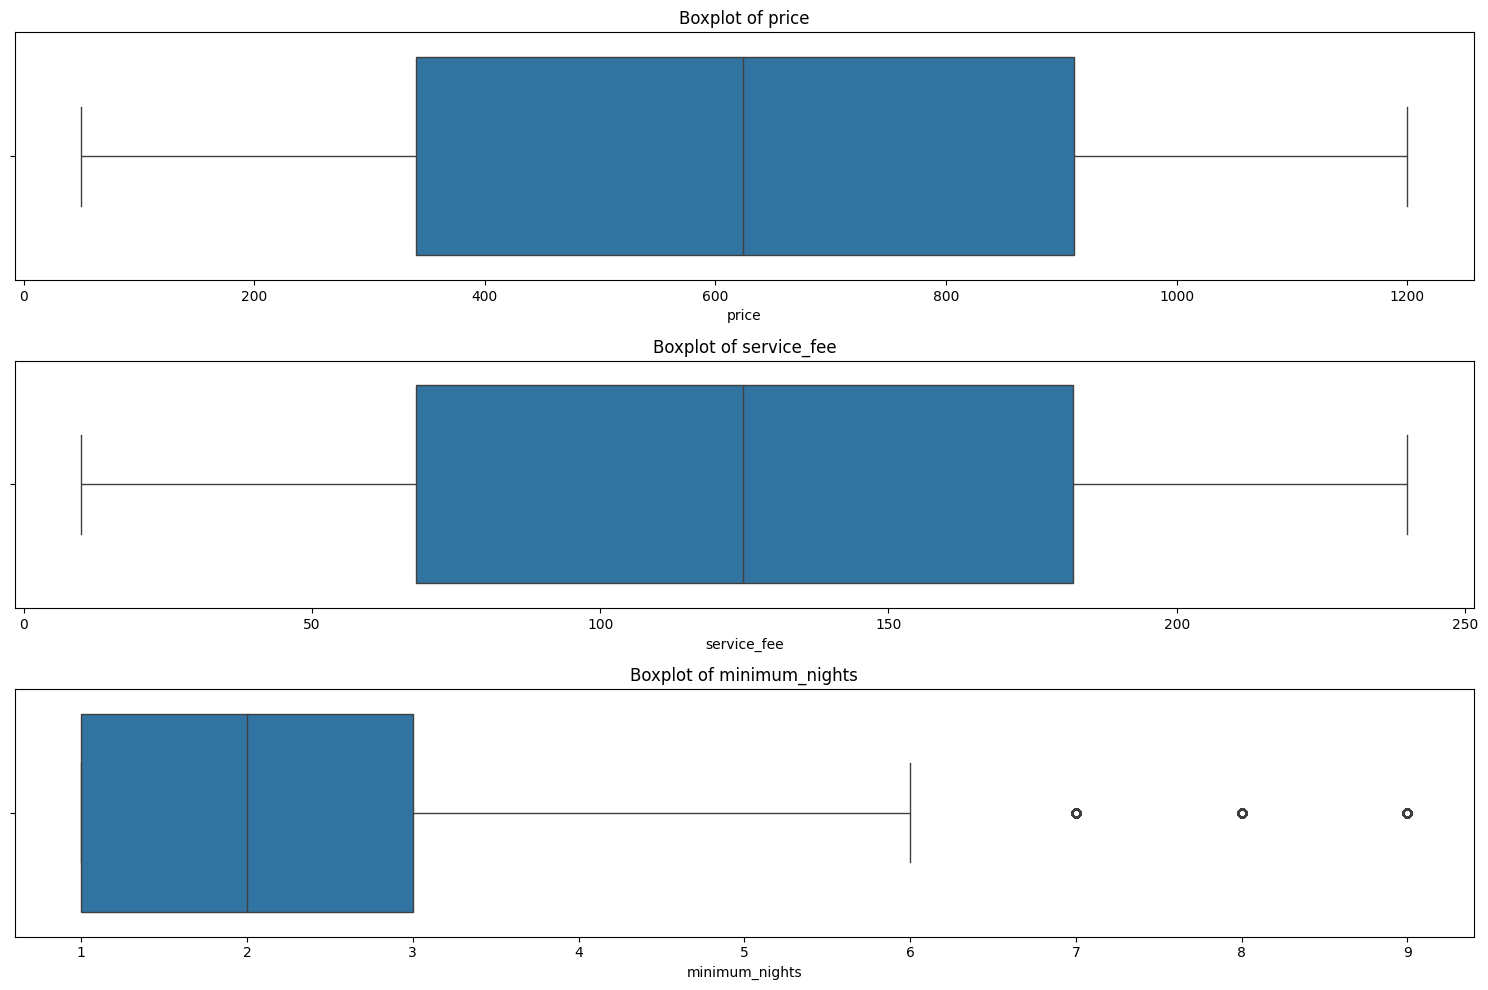

In [200]:
plt.figure(figsize=(15,10))

for i, var in enumerate(numerical_cols):
    plt.subplot(3,1,i+1)
    sns.boxplot(data=df, x=var)
    plt.title(f'Boxplot of {var}')  

plt.tight_layout()
plt.show()

##### Categorical Variables

We can also use the same inbuilt method to get stats for categorical variables (count, unique, top, freq).

In [201]:
categorical_cols =['host_identity_verified', 'neighbourhood_group',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'number_of_reviews', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365']

In [202]:
df.describe(include=[object,bool])

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,70760,70760,70760,70760,70760,70760,70760,70760,70760,70760,70760,70760,70760
unique,42645,2,10880,5,223,2,3,4,3,4,5,2,4
top,blank,verified,Michael,Brooklyn,Williamsburg,False,moderate,Entire home/apt,Moderate,1,3.0,Single-Host,Short-term
freq,167,35415,620,30080,5811,35507,23664,34959,24685,36320,16290,48512,30000


##### Insights :
- **host_identity_verified** : Normal
- **neighbourhood_group** : Frequency of a single value is a lot, visualization will show more info.
- **neighbourhood** : Seems normal
- **instant_bookable** : Normal
- **cancellation_policy** : Normal
- **room_type** : Half of all values are a single entry, distribution of others will show more information.
- **construction_year** : Single value dominates
- **number_of_reviews** : Single value dominates
- **reviews_per_month** : Single value dominates
- **review_rate_number** : Normal
- **calculated_host_listings_count** : Single value dominates
- **availability_365** : Normal

##### Visualization

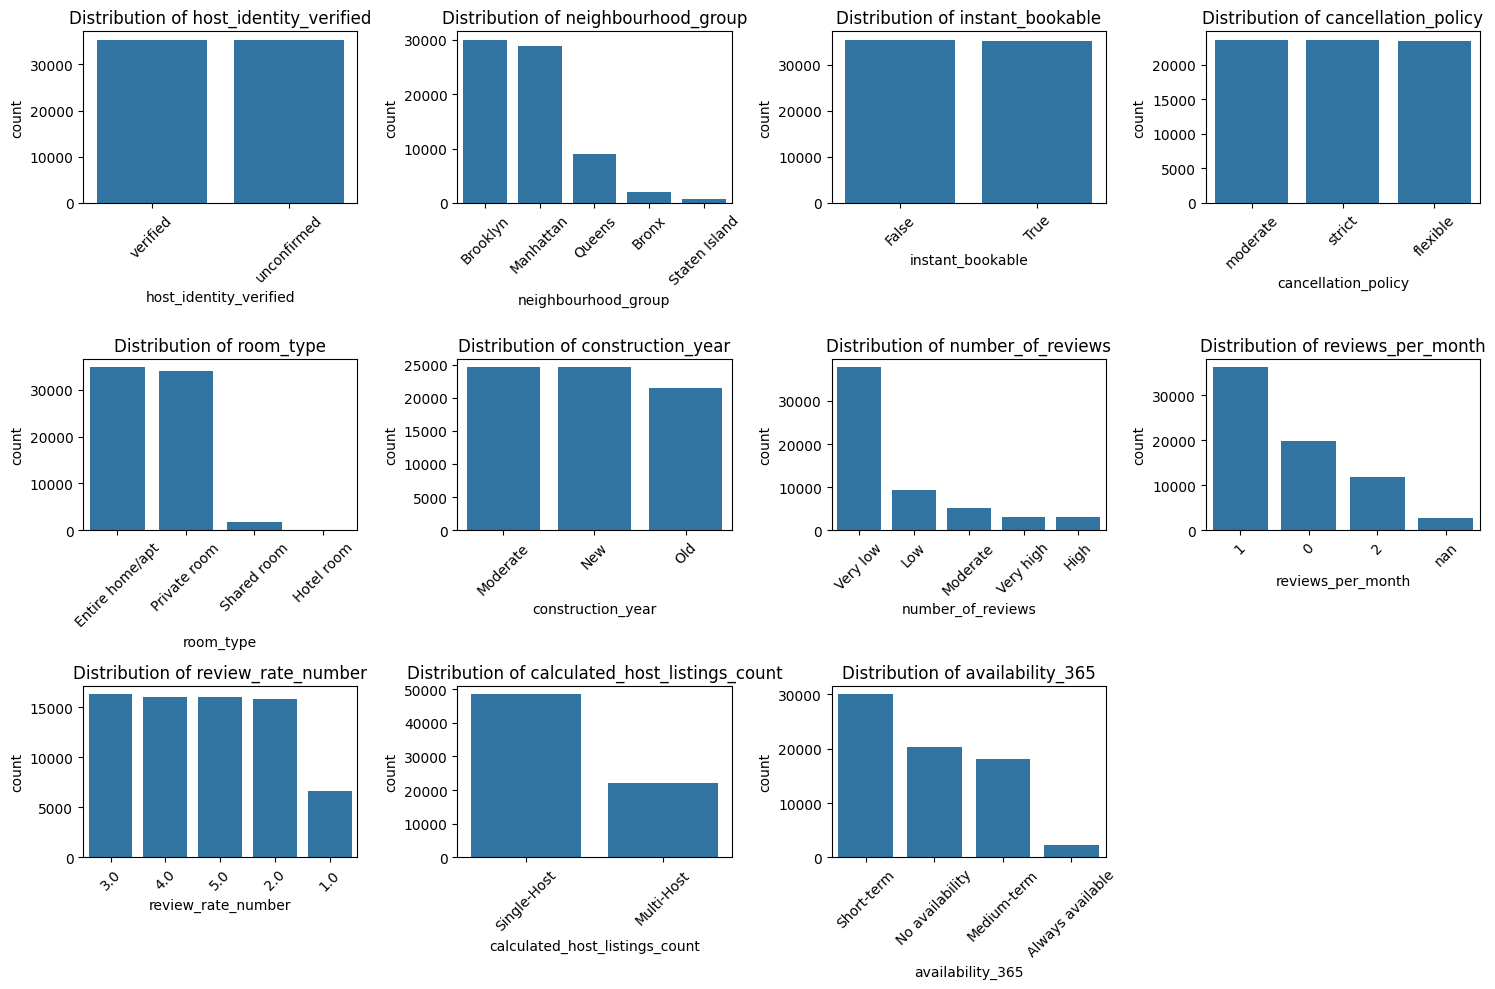

In [203]:
plt.figure(figsize=(15,10))

for i, col in enumerate(categorical_cols):
    plt.subplot(3,4,i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')  

plt.tight_layout()
plt.show()

Insights : 
- **host_identity_verified** : Equal distribution of verified and unverified listings.

- **neighbourhood_group** : Manhattan and Brooklyn seem to have the most listings out of all the others. More famous cities, better tourist attractions.

- **instant_bookable** : Again Equal distribution.

- **cancellation_policy** : Again Equal distribution.

- **room_type** : Entire Home/Apt and Private Room take up around 90% of the listings. People prefer privacy more and when travelling in a group entire home are more suitable.

- **construction_year** : Moderate (2009-2015) and New (2016-2022) have the almost the same number of listings. 

- **number_of_reviews** : Most of the listings have Very low ratings (less than 15), people don't like rating much after the stay.

- **reviews_per_month** : Most of the properties get around 1 review per month. People review very less for the properties they use.

- **review_rate_number** : 3, 4, 5, 2 are the most used review ratings given to the listings (in order). Most are same, people might not pay attention while giving reviews (low number of reviews too) but we can see the reviews with rating 1 are less so they might give out way more information than others.

- **calculated_host_listings_count** : Single-host properties are more listed than Multi-hosts.

- **availability_365** : Short-term and Medium-term listings are the most. This is likely as vacation homes and apartments are used for a while and then get empty so the properties gets back on the listing.

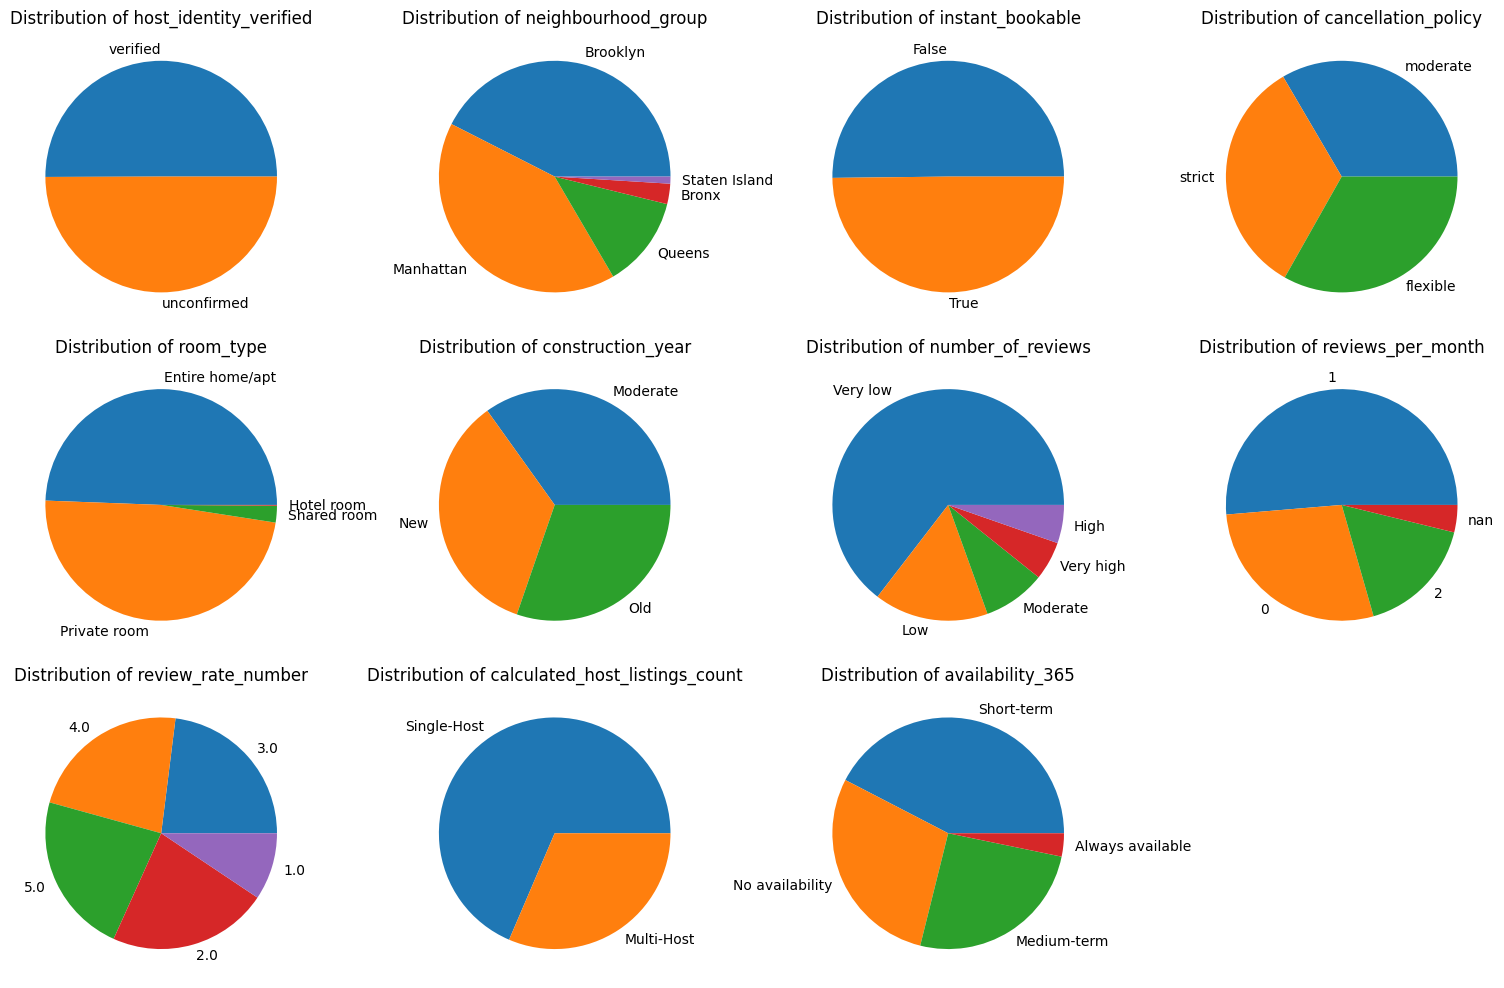

In [204]:
plt.figure(figsize=(15,10))

for i, col in enumerate(categorical_cols):
    plt.subplot(3,4,i+1)
    plt.pie(df[col].value_counts(), labels=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')  

plt.tight_layout()
plt.show()

Just another visualization to get a better understanding of the distribution of the variables.

We left one variable as it had too many unique values to plot, so we will get the basic info on it.

In [205]:
# Top 10 neighbourhood
df['neighbourhood'].value_counts()[:10:]

neighbourhood
Williamsburg          5811
Bedford-Stuyvesant    5409
Harlem                3830
Bushwick              3603
East Village          2562
Upper West Side       2476
Crown Heights         2420
Hell's Kitchen        2264
Upper East Side       2242
Midtown               2209
Name: count, dtype: int64

In [206]:
# Bottom 10 neighbourhood
df['neighbourhood'].value_counts()[:210:-1]

neighbourhood
Gerritsen Beach               1
Chelsea, Staten Island        1
Huguenot                      2
Rossville                     2
Fort Wadsworth                2
Bay Terrace, Staten Island    2
Woodrow                       2
Willowbrook                   3
Richmondtown                  3
Silver Lake                   3
Lighthouse Hill               3
New Dorp                      4
Name: count, dtype: int64

### Bivariate Analysis

##### Num vs Num

In [207]:
corr_matrix = df[['price', 'service_fee', 'minimum_nights']].corr()

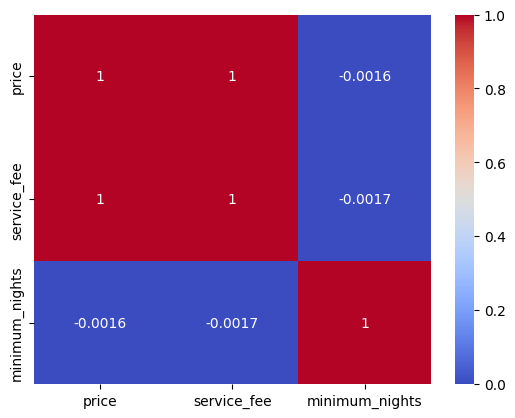

In [208]:
sns.heatmap(corr_matrix,cmap='coolwarm', annot=True)
plt.show()

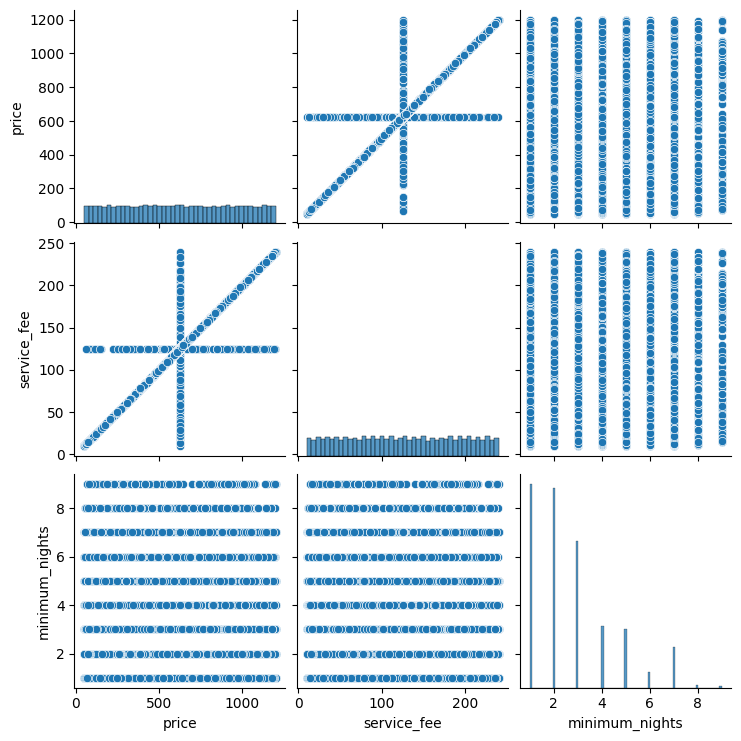

In [209]:
sns.pairplot(df[['price', 'service_fee', 'minimum_nights']])
plt.show()

##### Insights
- Perfect Correlation (1.0) between price and service_fee

    - This means service_fee is directly proportional to price.
    - Likely a fixed percentage fee charged on top of the listing price. We will check that.
    - Also the plus sign could mean that there is another variable influencing these variable or they have non-linear relationship. We will check this too.

- Near-Zero Correlation with minimum_nights

    - price and minimum_nights: -0.0016 (almost no relationship).
    - service_fee and minimum_nights: -0.0017 (again, no relationship).
    - This suggests that setting different values for minimum_nights doesn't necessarily mean higher or lower prices. It is just a bounding parameter while booking on Airbnb.

In [210]:
(df['service_fee']/df['price']).round(2).unique()


array([0.2 , 0.19, 0.24, 0.21, 0.09, 0.25, 0.13, 0.12, 0.14, 0.11, 0.04,
       0.35, 0.23, 0.15, 0.08, 0.3 , 0.49, 0.32, 1.12, 0.92, 0.52, 0.1 ,
       1.36, 0.17, 0.28, 0.18, 0.48, 0.97, 0.31, 0.02, 0.33, 0.34, 0.06,
       0.26, 0.16, 0.27, 0.37, 0.03, 0.29, 0.36, 0.07, 1.07, 0.22, 0.42,
       0.46, 1.69, 0.54, 0.4 , 0.56, 0.55, 0.39, 1.48, 0.38, 1.95, 0.9 ,
       1.06, 0.45, 0.83, 0.05, 0.41, 0.85])

As we can see that there are many different values in this pointing to a non-linear relationship (might be a piecewise linear - fixed fees + percentage based fees). Another thing to note here is that neighbourhood, room_type, etc also impact this percentage. 

Let's try to plot their logs and see if we get anything.

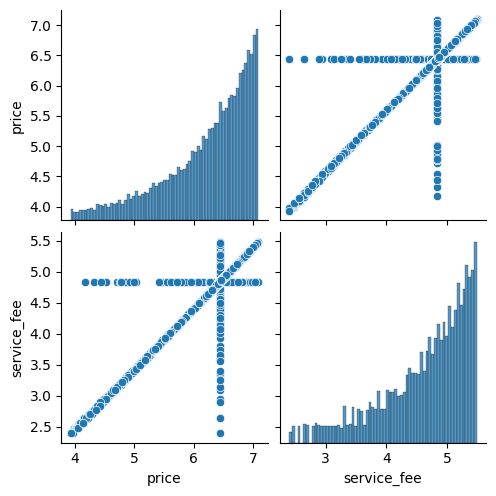

In [211]:
price_log = pd.DataFrame(np.log1p(df['price']))
service_fee_log = pd.DataFrame(np.log1p(df['service_fee']))
sns.pairplot(pd.concat([price_log, service_fee_log], axis=1))
plt.show()

The results are almost similar to the ones above, lets now move to see and check the non-linear relationship between the two.

In [212]:
from scipy.stats import spearmanr

spearman_corr, _ = spearmanr(df['price'], df['service_fee'])
print("Spearman Correlation:", spearman_corr)


Spearman Correlation: 0.9981131931708758


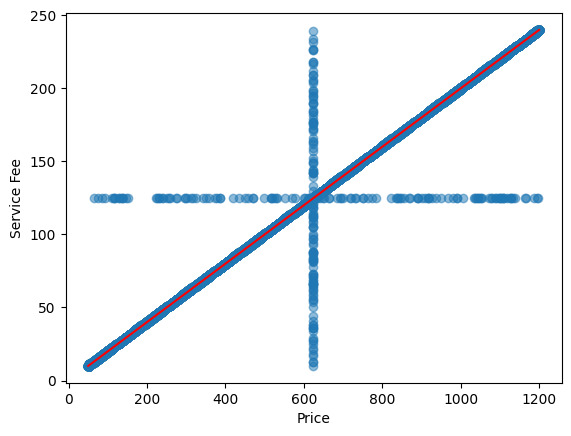

In [213]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess(df['service_fee'], df['price'], frac=0.6)  
plt.scatter(df['price'], df['service_fee'], alpha=0.5)  
plt.plot(lowess[:, 0], lowess[:, 1], color='red')  
plt.xlabel('Price')  
plt.ylabel('Service Fee')  
plt.show()

In [214]:
df.groupby('price')['service_fee'].nunique().sort_values(ascending=False).head(20)


price
623.788185     100
718.000000       2
230.000000       2
147.000000       2
720.000000       2
990.000000       2
151.000000       2
1040.000000      2
523.000000       2
350.000000       2
1110.000000      2
1109.000000      2
577.000000       2
1107.000000      2
225.000000       2
774.000000       2
848.000000       2
950.000000       2
516.000000       2
238.000000       2
Name: service_fee, dtype: int64

All the 3 tests show that we made a mistake with our first idea of non linear relationship. The reason for the plus sign is simple - 

- Repeated Values at Specific Price Points (Discretization Effect)

    - If multiple listings have the same price but different service fees, you get vertical streaks.
    - If multiple listings have the same service fee but different prices, you get horizontal streaks.
    - This typically happens when service fees or prices are rounded to certain values (e.g., all prices at 600 have a variety of service fees).


This ends the Num vs Num analysis.

##### Cat vs Cat

In [215]:
categorical_cols

['host_identity_verified',
 'neighbourhood_group',
 'instant_bookable',
 'cancellation_policy',
 'room_type',
 'construction_year',
 'number_of_reviews',
 'reviews_per_month',
 'review_rate_number',
 'calculated_host_listings_count',
 'availability_365']

We'll run Chi-Square test on these variables to check if a pair is statistically independent ot not. Another thing we could do is find the strength of association if there is a relationship, we will use Cramer's V for that.

In [216]:
from scipy.stats import chi2_contingency

for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        table = pd.crosstab(df[categorical_cols[i]], df[categorical_cols[j]])
        chi2, p, dof, expected = chi2_contingency(table)
        n = table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(table.shape) - 1)))

        if p < 0.05: # Reject the null hypothesis
            print(f'{categorical_cols[i]} vs {categorical_cols[j]}')
            print(f'Association Strength: {cramers_v.round(2)}')


neighbourhood_group vs room_type
Association Strength: 0.08
neighbourhood_group vs construction_year
Association Strength: 0.01
neighbourhood_group vs number_of_reviews
Association Strength: 0.04
neighbourhood_group vs reviews_per_month
Association Strength: 0.06
neighbourhood_group vs review_rate_number
Association Strength: 0.02
neighbourhood_group vs calculated_host_listings_count
Association Strength: 0.12
neighbourhood_group vs availability_365
Association Strength: 0.08
room_type vs number_of_reviews
Association Strength: 0.01
room_type vs reviews_per_month
Association Strength: 0.03
room_type vs review_rate_number
Association Strength: 0.01
room_type vs calculated_host_listings_count
Association Strength: 0.24
room_type vs availability_365
Association Strength: 0.06
construction_year vs review_rate_number
Association Strength: 0.02
number_of_reviews vs reviews_per_month
Association Strength: 0.28
number_of_reviews vs review_rate_number
Association Strength: 0.03
number_of_review

##### Insights :

{Association - 
 0.1 : Weak,
 0.3 : Moderate,
 0.5 : Strong}

- As we can see from the list, **neighbourhood_group** has the most number of associations with other variables. Strongest being with **calculated_host_listings_count**.

- Next is **room_type**, again having the strong association with **calculated_host_listings_count**.

- Next is **number_of_reviews** - Strongest with **reviews_per_month**.

- **reviews_per_month** - Strongest with **calculated_host_listings_count**

- **calculated_host_listings_count** has a few with strongest being with **availability_365**

(Strongest here is relative to others in this list and not in general.)

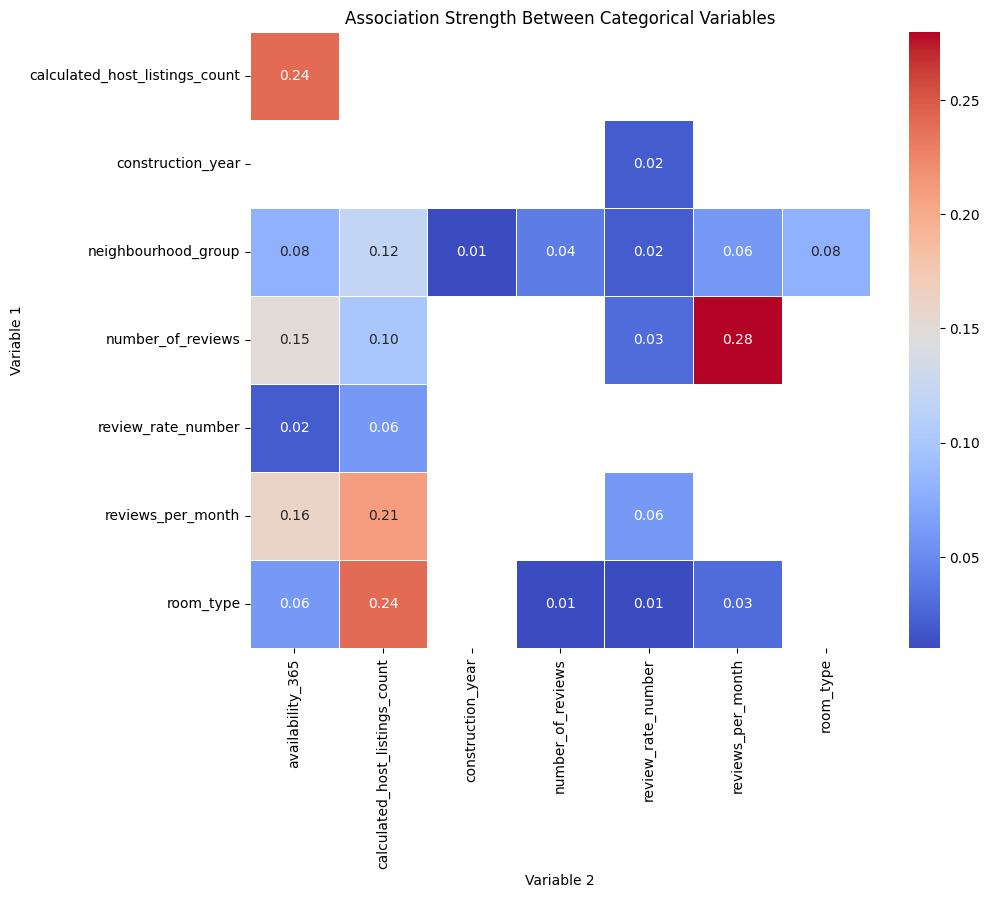

In [217]:
# Data as a list of dictionaries
data = [
    ("neighbourhood_group", "room_type", 0.08),
    ("neighbourhood_group", "construction_year", 0.01),
    ("neighbourhood_group", "number_of_reviews", 0.04),
    ("neighbourhood_group", "reviews_per_month", 0.06),
    ("neighbourhood_group", "review_rate_number", 0.02),
    ("neighbourhood_group", "calculated_host_listings_count", 0.12),
    ("neighbourhood_group", "availability_365", 0.08),
    ("room_type", "number_of_reviews", 0.01),
    ("room_type", "reviews_per_month", 0.03),
    ("room_type", "review_rate_number", 0.01),
    ("room_type", "calculated_host_listings_count", 0.24),
    ("room_type", "availability_365", 0.06),
    ("construction_year", "review_rate_number", 0.02),
    ("number_of_reviews", "reviews_per_month", 0.28),
    ("number_of_reviews", "review_rate_number", 0.03),
    ("number_of_reviews", "calculated_host_listings_count", 0.1),
    ("number_of_reviews", "availability_365", 0.15),
    ("reviews_per_month", "review_rate_number", 0.06),
    ("reviews_per_month", "calculated_host_listings_count", 0.21),
    ("reviews_per_month", "availability_365", 0.16),
    ("review_rate_number", "calculated_host_listings_count", 0.06),
    ("review_rate_number", "availability_365", 0.02),
    ("calculated_host_listings_count", "availability_365", 0.24)
]

# Convert list to DataFrame
assoc_matrix = pd.DataFrame(data, columns=["Variable 1", "Variable 2", "Association Strength"])

# Pivot for heatmap
assoc_pivot = assoc_matrix.pivot(index="Variable 1", columns="Variable 2", values="Association Strength")

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(assoc_pivot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Association Strength Between Categorical Variables")
plt.show()


In [226]:
ncategorical_cols = ['host_identity_verified',
 'neighbourhood_group',
 'instant_bookable',
 'cancellation_policy',
 'room_type',
 'construction_year',
 'number_of_reviews',
 'reviews_per_month',
 'review_rate_number',
 'calculated_host_listings_count',
 'availability_365']

In [227]:
def plot_cat(primary_var):
    ncategorical_cols.remove(primary_var)
    fig, axes = plt.subplots(5,2,figsize=(15,25))
    axes = axes.flatten()
    plot_idx = 0
    for i in range(len(ncategorical_cols)):
        table = pd.crosstab(df[primary_var], df[ncategorical_cols[i]])
        table.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[plot_idx])
        
        axes[plot_idx].set_ylabel("Count")
        axes[plot_idx].set_title(f"{primary_var} vs {ncategorical_cols[i]}")
        
        plot_idx += 1

    plt.tight_layout()
    plt.show()


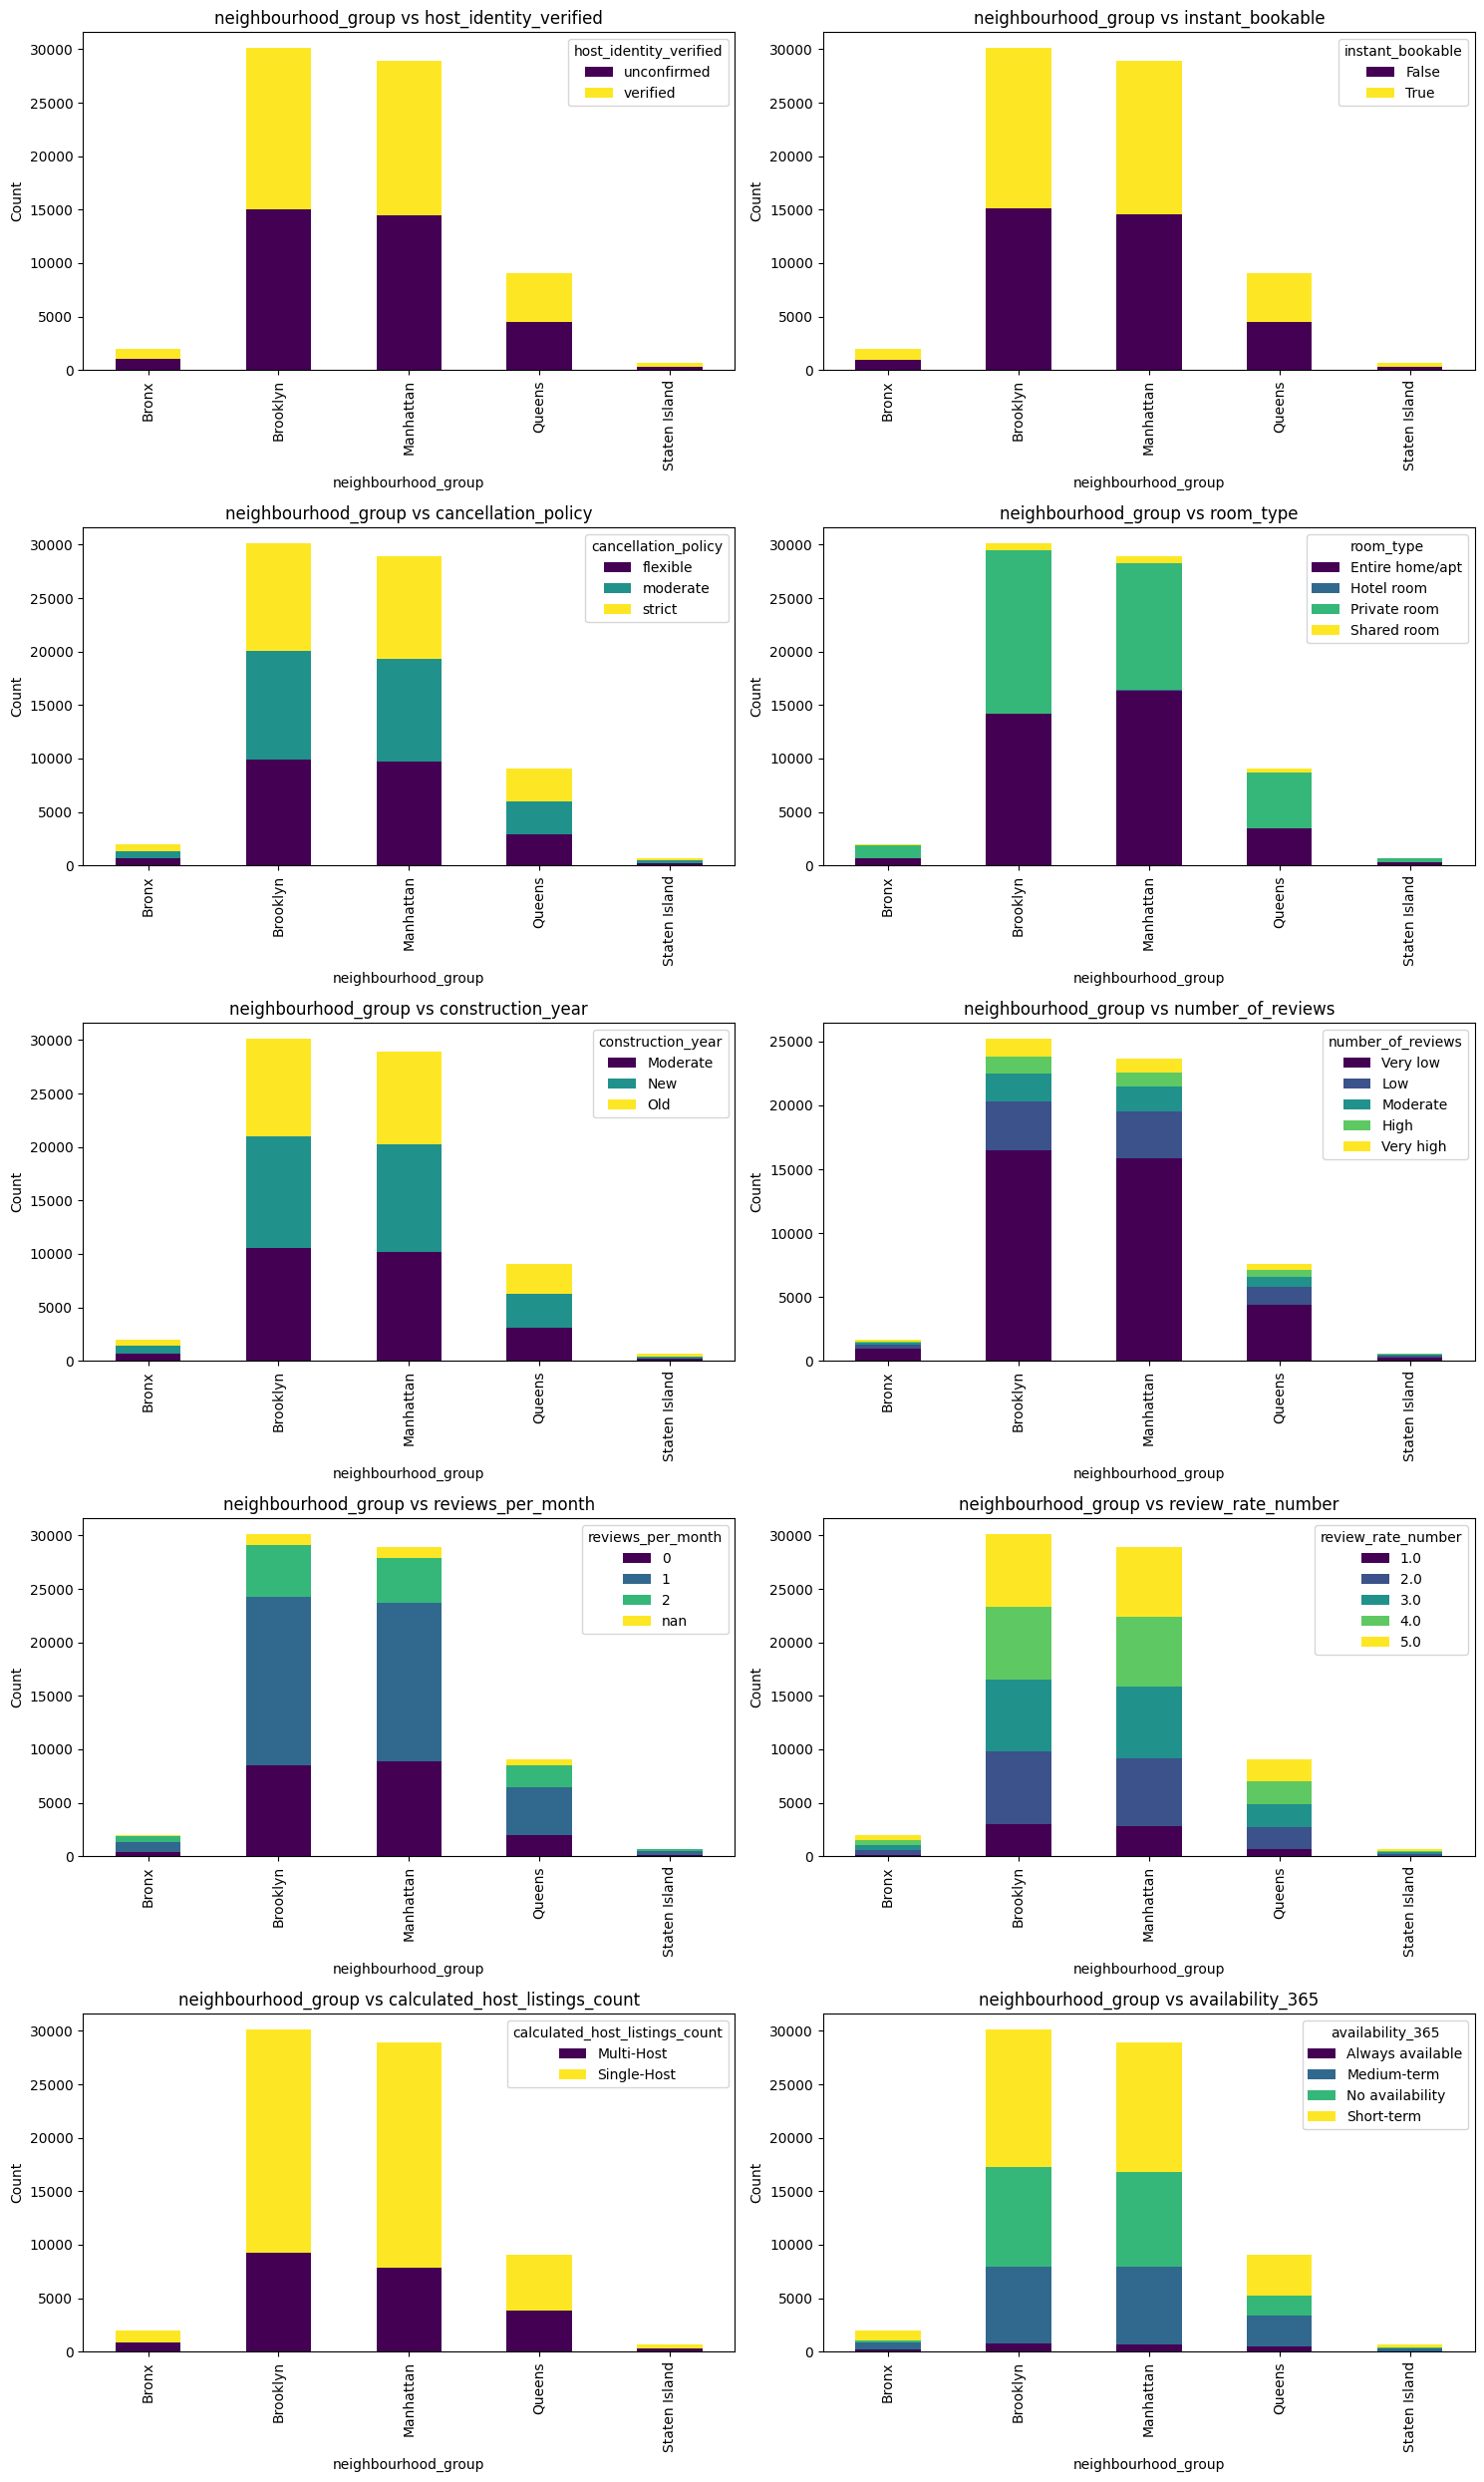

In [228]:
plot_cat('neighbourhood_group')

#### Insights : 

1️ **Neighbourhood Group vs Host Identity Verified**
- **Most hosts in Brooklyn and Manhattan are verified.**
- **Queens and Staten Island have a higher proportion of unverified hosts** compared to their total listings.

2️ **Neighbourhood Group vs Instant Bookable**
- **Most listings in all boroughs allow instant booking**, but there are still a significant number that require prior approval.
- **Brooklyn and Manhattan have the highest number of instant bookable listings.**

3️ **Neighbourhood Group vs Cancellation Policy**
- **Strict cancellation policies are more common in Manhattan and Brooklyn.**
- **Flexible and moderate policies are more evenly distributed.**
- Hosts in **Staten Island and Bronx tend to have more flexible cancellation policies.**

4️ **Neighbourhood Group vs Room Type**
- **Entire homes/apartments dominate in Manhattan and Brooklyn.**
- **Private rooms are quite common in all boroughs, but especially in Queens and Brooklyn.**
- **Shared rooms are the least common option overall.**

5️ **Neighbourhood Group vs Construction Year**
- **Most properties in Brooklyn and Manhattan are older.**
- **Queens and Staten Island have a slightly higher percentage of newer properties.**
- This might impact **pricing and demand**, as newer buildings may attract more guests.

6️ **Neighbourhood Group vs Number of Reviews**
- **Most listings have very low reviews (0-10 reviews).**
- **Brooklyn and Manhattan have more listings with high numbers of reviews** compared to other boroughs.
- **Staten Island has very few reviewed listings**, indicating less demand.

7️ **Neighbourhood Group vs Reviews per Month**
- **Many listings have very few reviews per month (0 or 1).**
- **Listings in Manhattan and Brooklyn tend to receive more frequent reviews.**
- Queens and Staten Island have **lower review activity** per month.

8️ **Neighbourhood Group vs Review Rate (Rating)**
- **Most listings have ratings between 4.0 and 5.0, indicating overall customer satisfaction.**
- **Lower-rated listings (2.0–3.0) are less common.**
- Manhattan and Brooklyn have the highest number of highly-rated listings.


9 **Neighbourhood Group vs Host Listings Count**
- **Brooklyn and Manhattan have more multi-host properties (hosts managing multiple listings).**
- **Queens and Staten Island have a higher percentage of single-host properties.**
- This suggests **more commercial Airbnb activity in Brooklyn & Manhattan**, whereas **Queens and Staten Island might have more casual hosts.** 

10 **Neighbourhood Group vs Availability (365 days)**
- **A mix of availability durations is seen across boroughs.**
- **Many properties in Manhattan and Brooklyn are "Always Available".**
- **Queens and Staten Island have a larger proportion of "No Availability" or "Short-term Availability".**

---

**Overall Insights & Business Takeaways**
1. **Manhattan & Brooklyn dominate Airbnb listings** with more verified hosts, higher reviews, and stricter policies.
2. **Queens and Staten Island have a smaller market**, with more casual hosts and flexible policies.
3. **Entire homes/apartments are the most common**, but private rooms have significant demand.
4. **Brooklyn and Manhattan are the most competitive boroughs for Airbnb hosts**, while **Queens and Staten Island offer opportunities for new hosts** due to less saturation.
5. **Instant booking and high ratings are crucial for visibility**—most high-rated listings allow instant booking.

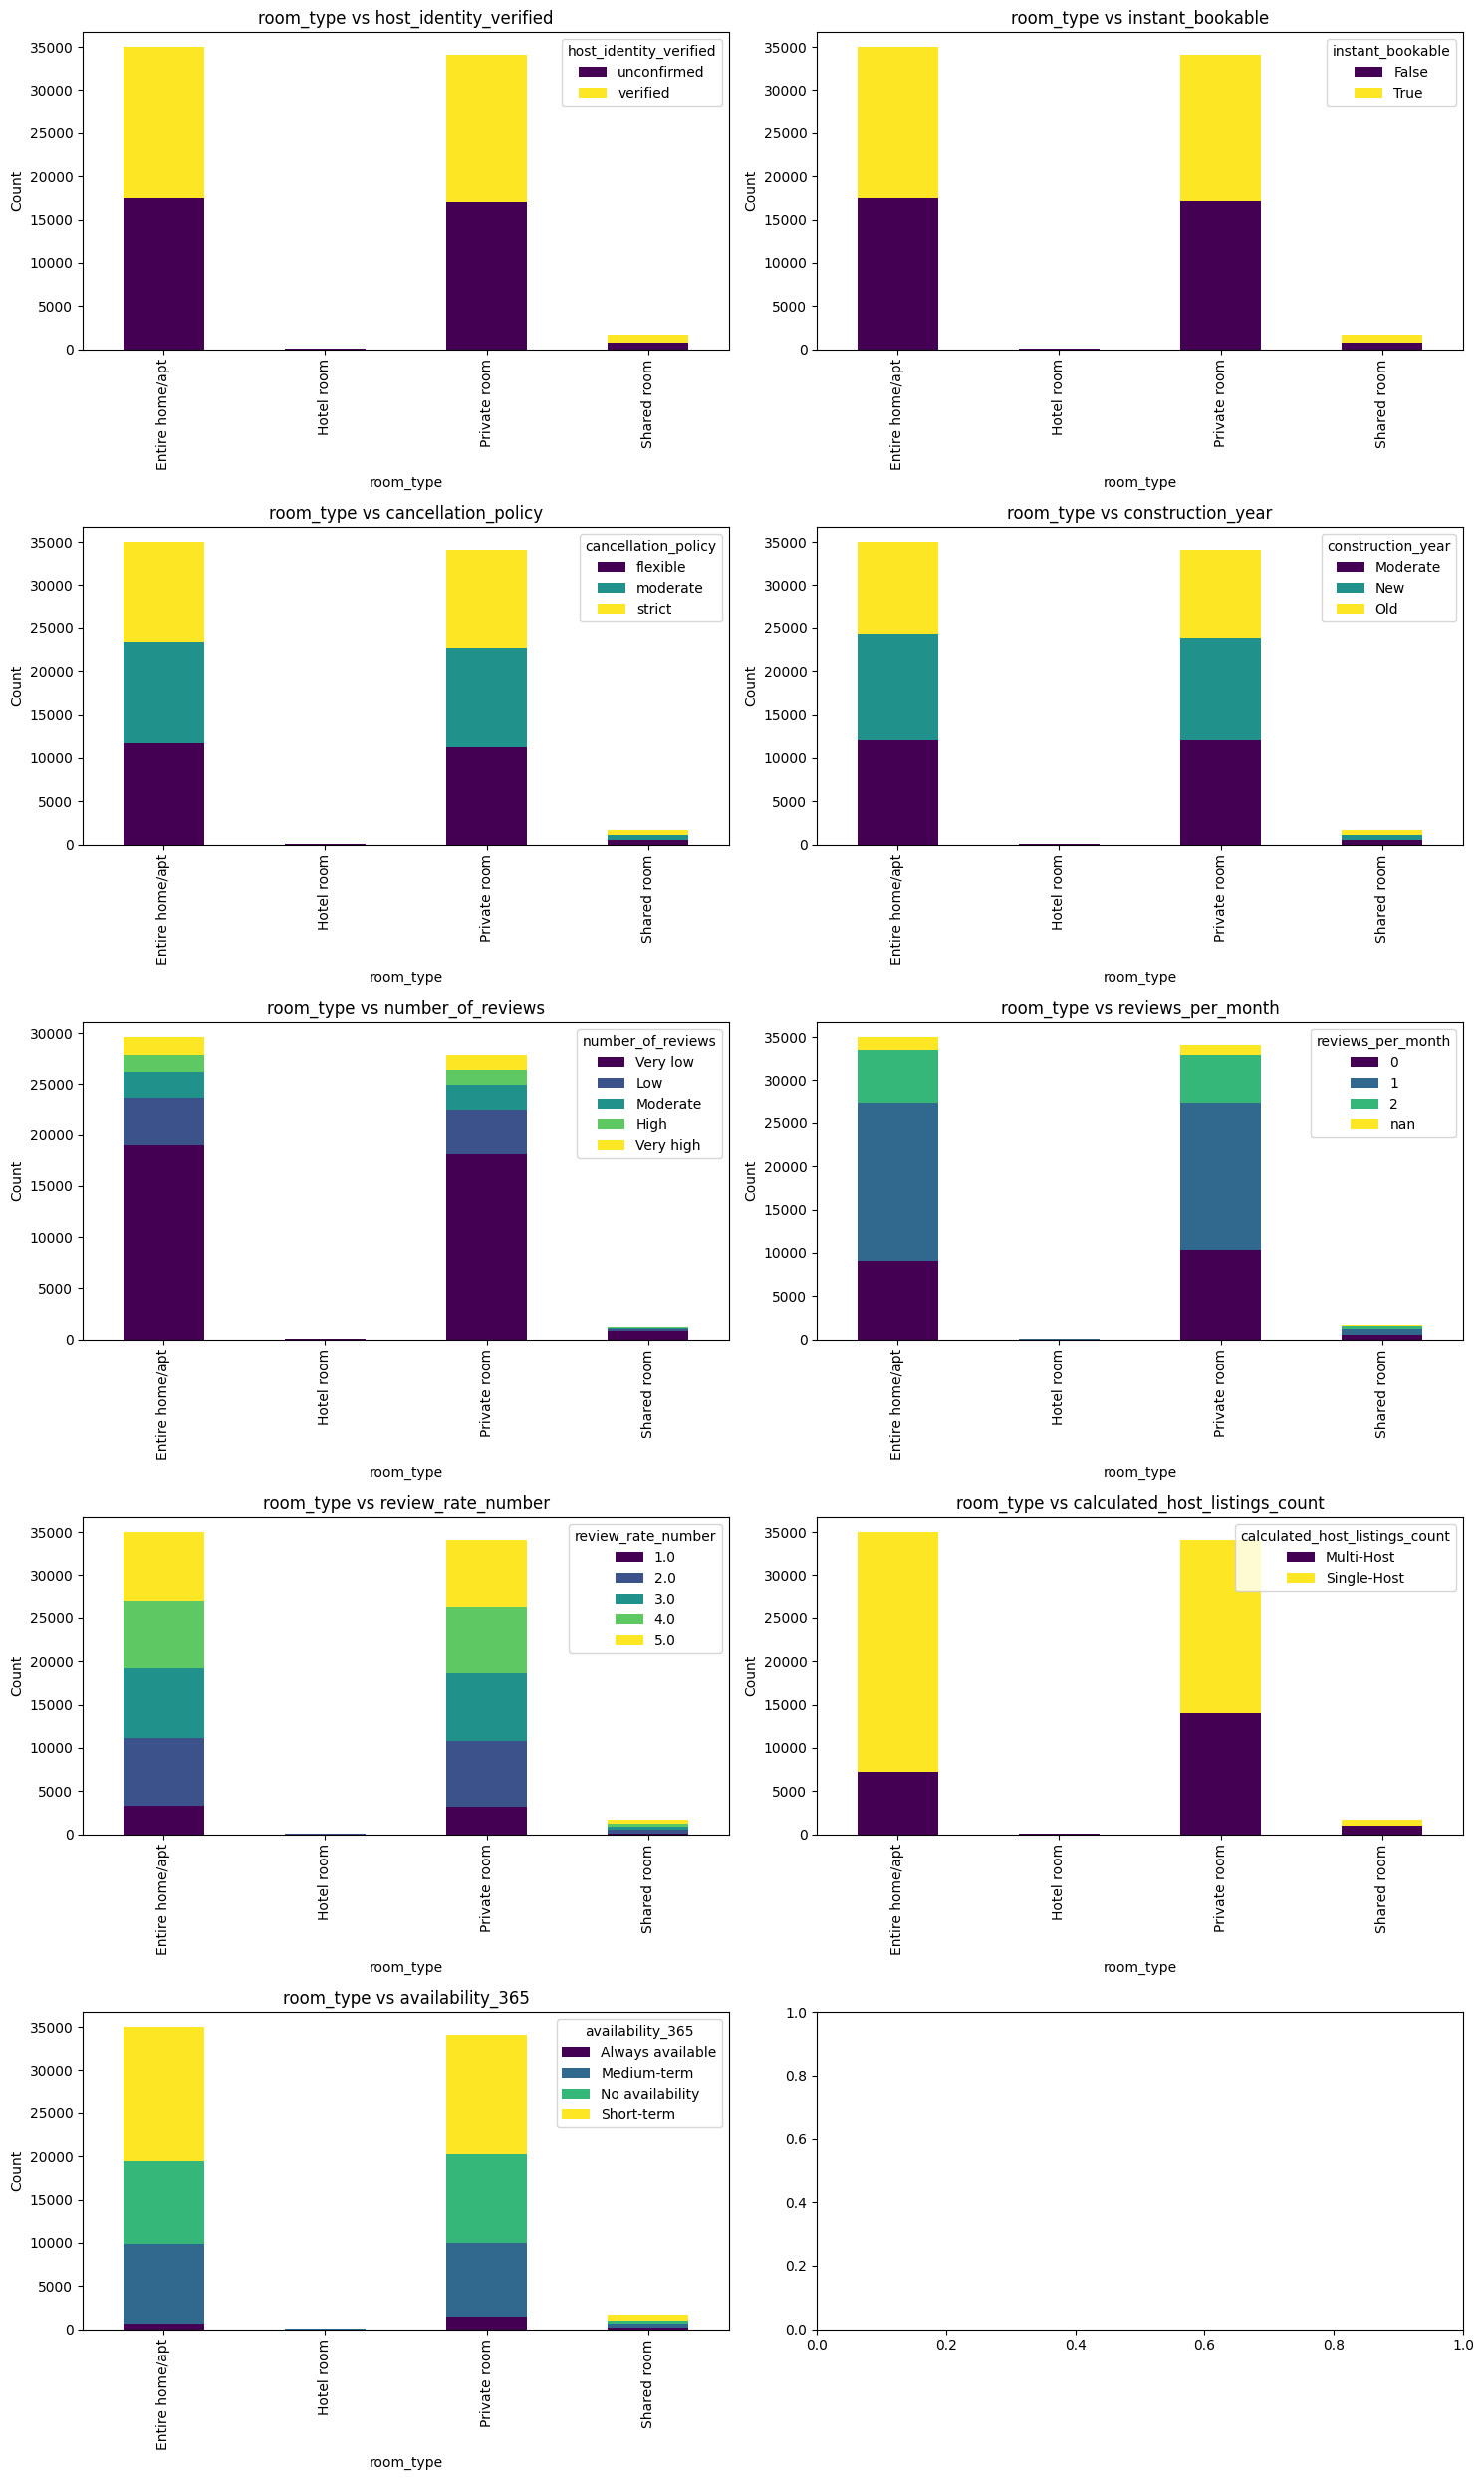

In [229]:
plot_cat('room_type')

#### Insights
1. **Host Identity Verified**:
   - Most listings for entire homes and private rooms have verified hosts.
   - Shared rooms have the lowest verification rates.

2. **Instant Bookable**:
   - A large proportion of entire homes and private rooms allow instant booking.
   - Hotel rooms also seem to have a significant share of instant bookable listings.

3. **Cancellation Policy**:
   - Entire homes and hotel rooms tend to have a mix of flexible and strict policies.
   - Private and shared rooms have a higher proportion of flexible policies.

4. **Construction Year**:
   - The majority of listings fall into "Old" or "Moderate" categories, regardless of room type.
   - Hotel rooms tend to be newer than private or shared rooms.

5. **Number of Reviews & Reviews per Month**:
   - Entire homes and hotel rooms have moderate-to-low review activity.
   - Private rooms have a more balanced distribution of review activity.
   - Shared rooms have very few reviews overall.

6. **Review Rate Number**:
   - Most listings have high ratings (4.0-5.0), with fewer low-rated properties.
   - Private rooms and shared rooms have slightly more variability in ratings.

7. **Calculated Host Listings Count**:
   - Entire homes are more likely to be owned by multi-hosts.
   - Private and shared rooms tend to be single-host listings.

8. **Availability (365 Days)**:
   - Many entire homes and private rooms are "Always Available" or available for the "Medium-term."
   - Shared rooms have the lowest availability.

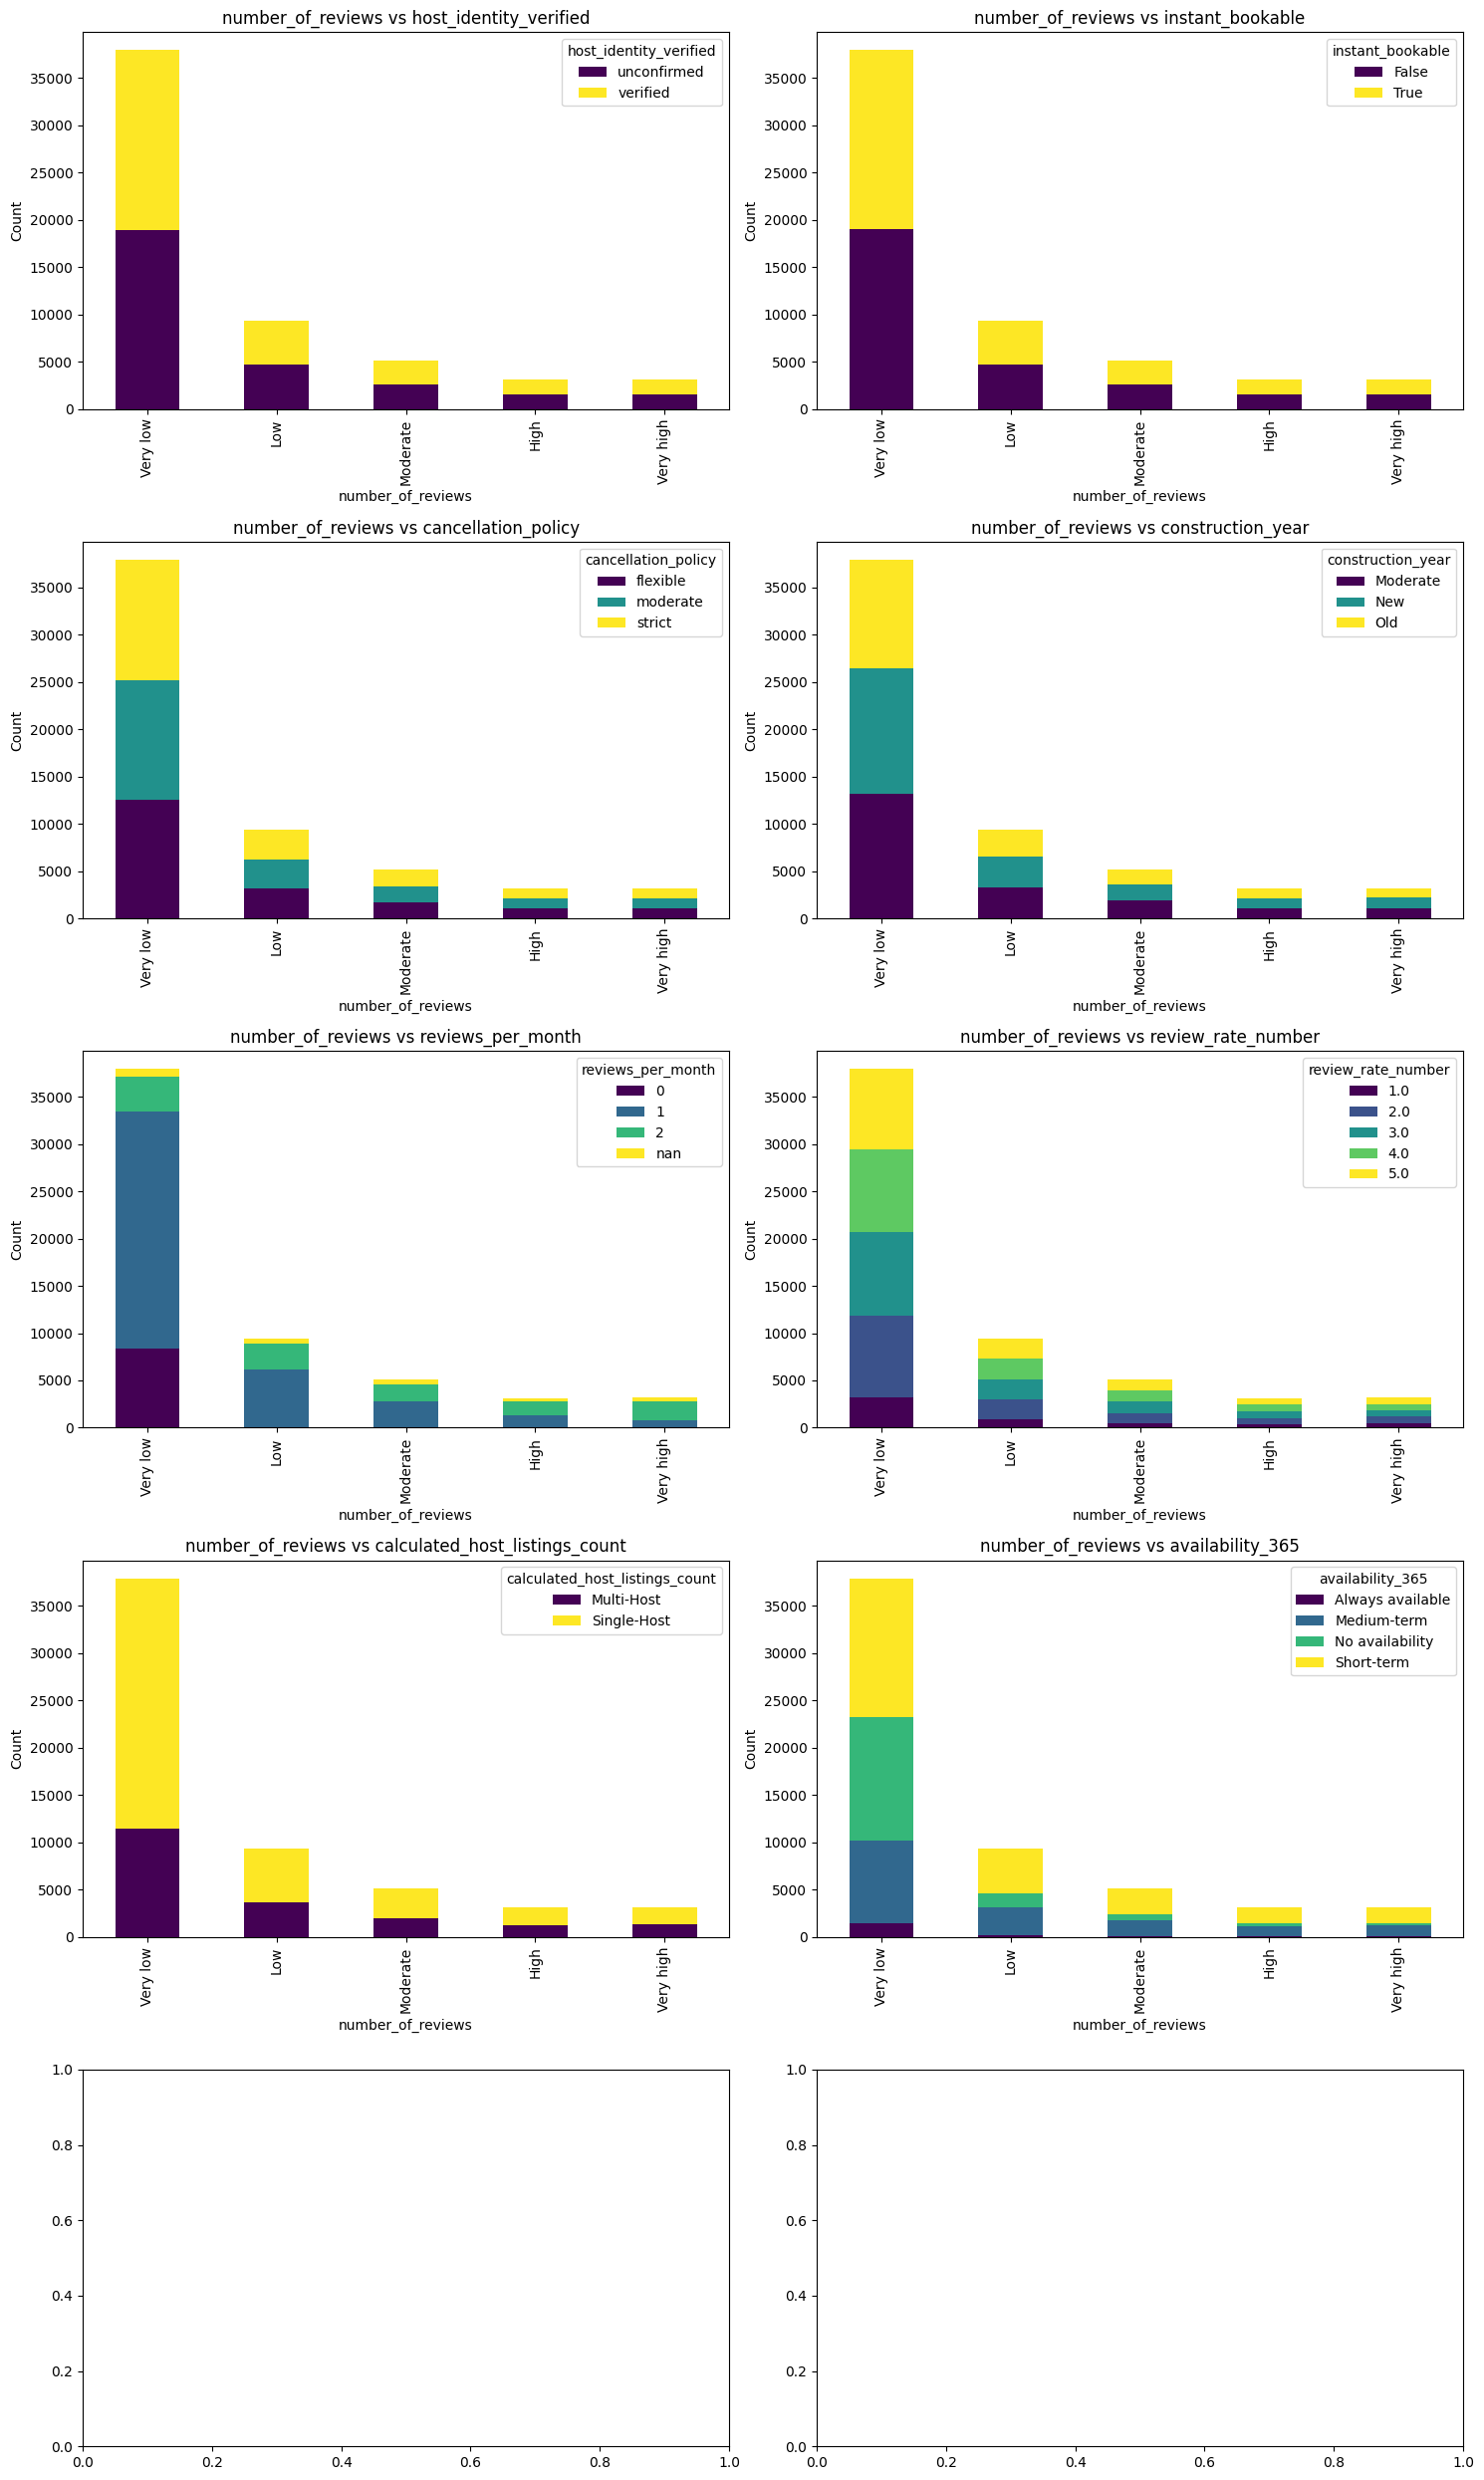

In [230]:
plot_cat('number_of_reviews')

#### Insights

1. **Host Identity Verified vs. Number of Reviews**  
   - Verified hosts tend to have more reviews, but unverified hosts still make up a large portion of listings.
   - Listings with very low reviews are mostly from unverified hosts.

2. **Instant Bookable vs. Number of Reviews**  
   - Instant bookable listings have a higher proportion of reviews.
   - Non-instant bookable listings dominate the very low review category.

3. **Cancellation Policy vs. Number of Reviews**  
   - Listings with a **flexible** cancellation policy have a more balanced distribution across all review categories.
   - Strict policies are more common in listings with low reviews.

4. **Construction Year vs. Number of Reviews**  
   - Older properties tend to have **fewer reviews**, while moderate and new properties have a relatively even distribution.

5. **Reviews Per Month vs. Number of Reviews**  
   - Many listings with **very low reviews have zero reviews per month**, indicating inactive or new properties.
   - Listings with moderate and high reviews generally receive at least one review per month.

6. **Review Rate (Score) vs. Number of Reviews**  
   - Most listings maintain a **review score between 4.0 and 5.0**, regardless of review count.
   - Low-rated properties are rare, but they exist across all review categories.

7. **Host Listing Count vs. Number of Reviews**  
   - **Single-host listings dominate** at very low review counts.
   - Multi-host listings tend to have higher reviews, likely due to better management and experience.

8. **Availability (365 Days) vs. Number of Reviews**  
   - Always-available listings tend to get more reviews.
   - No-availability and short-term listings often have very low reviews.

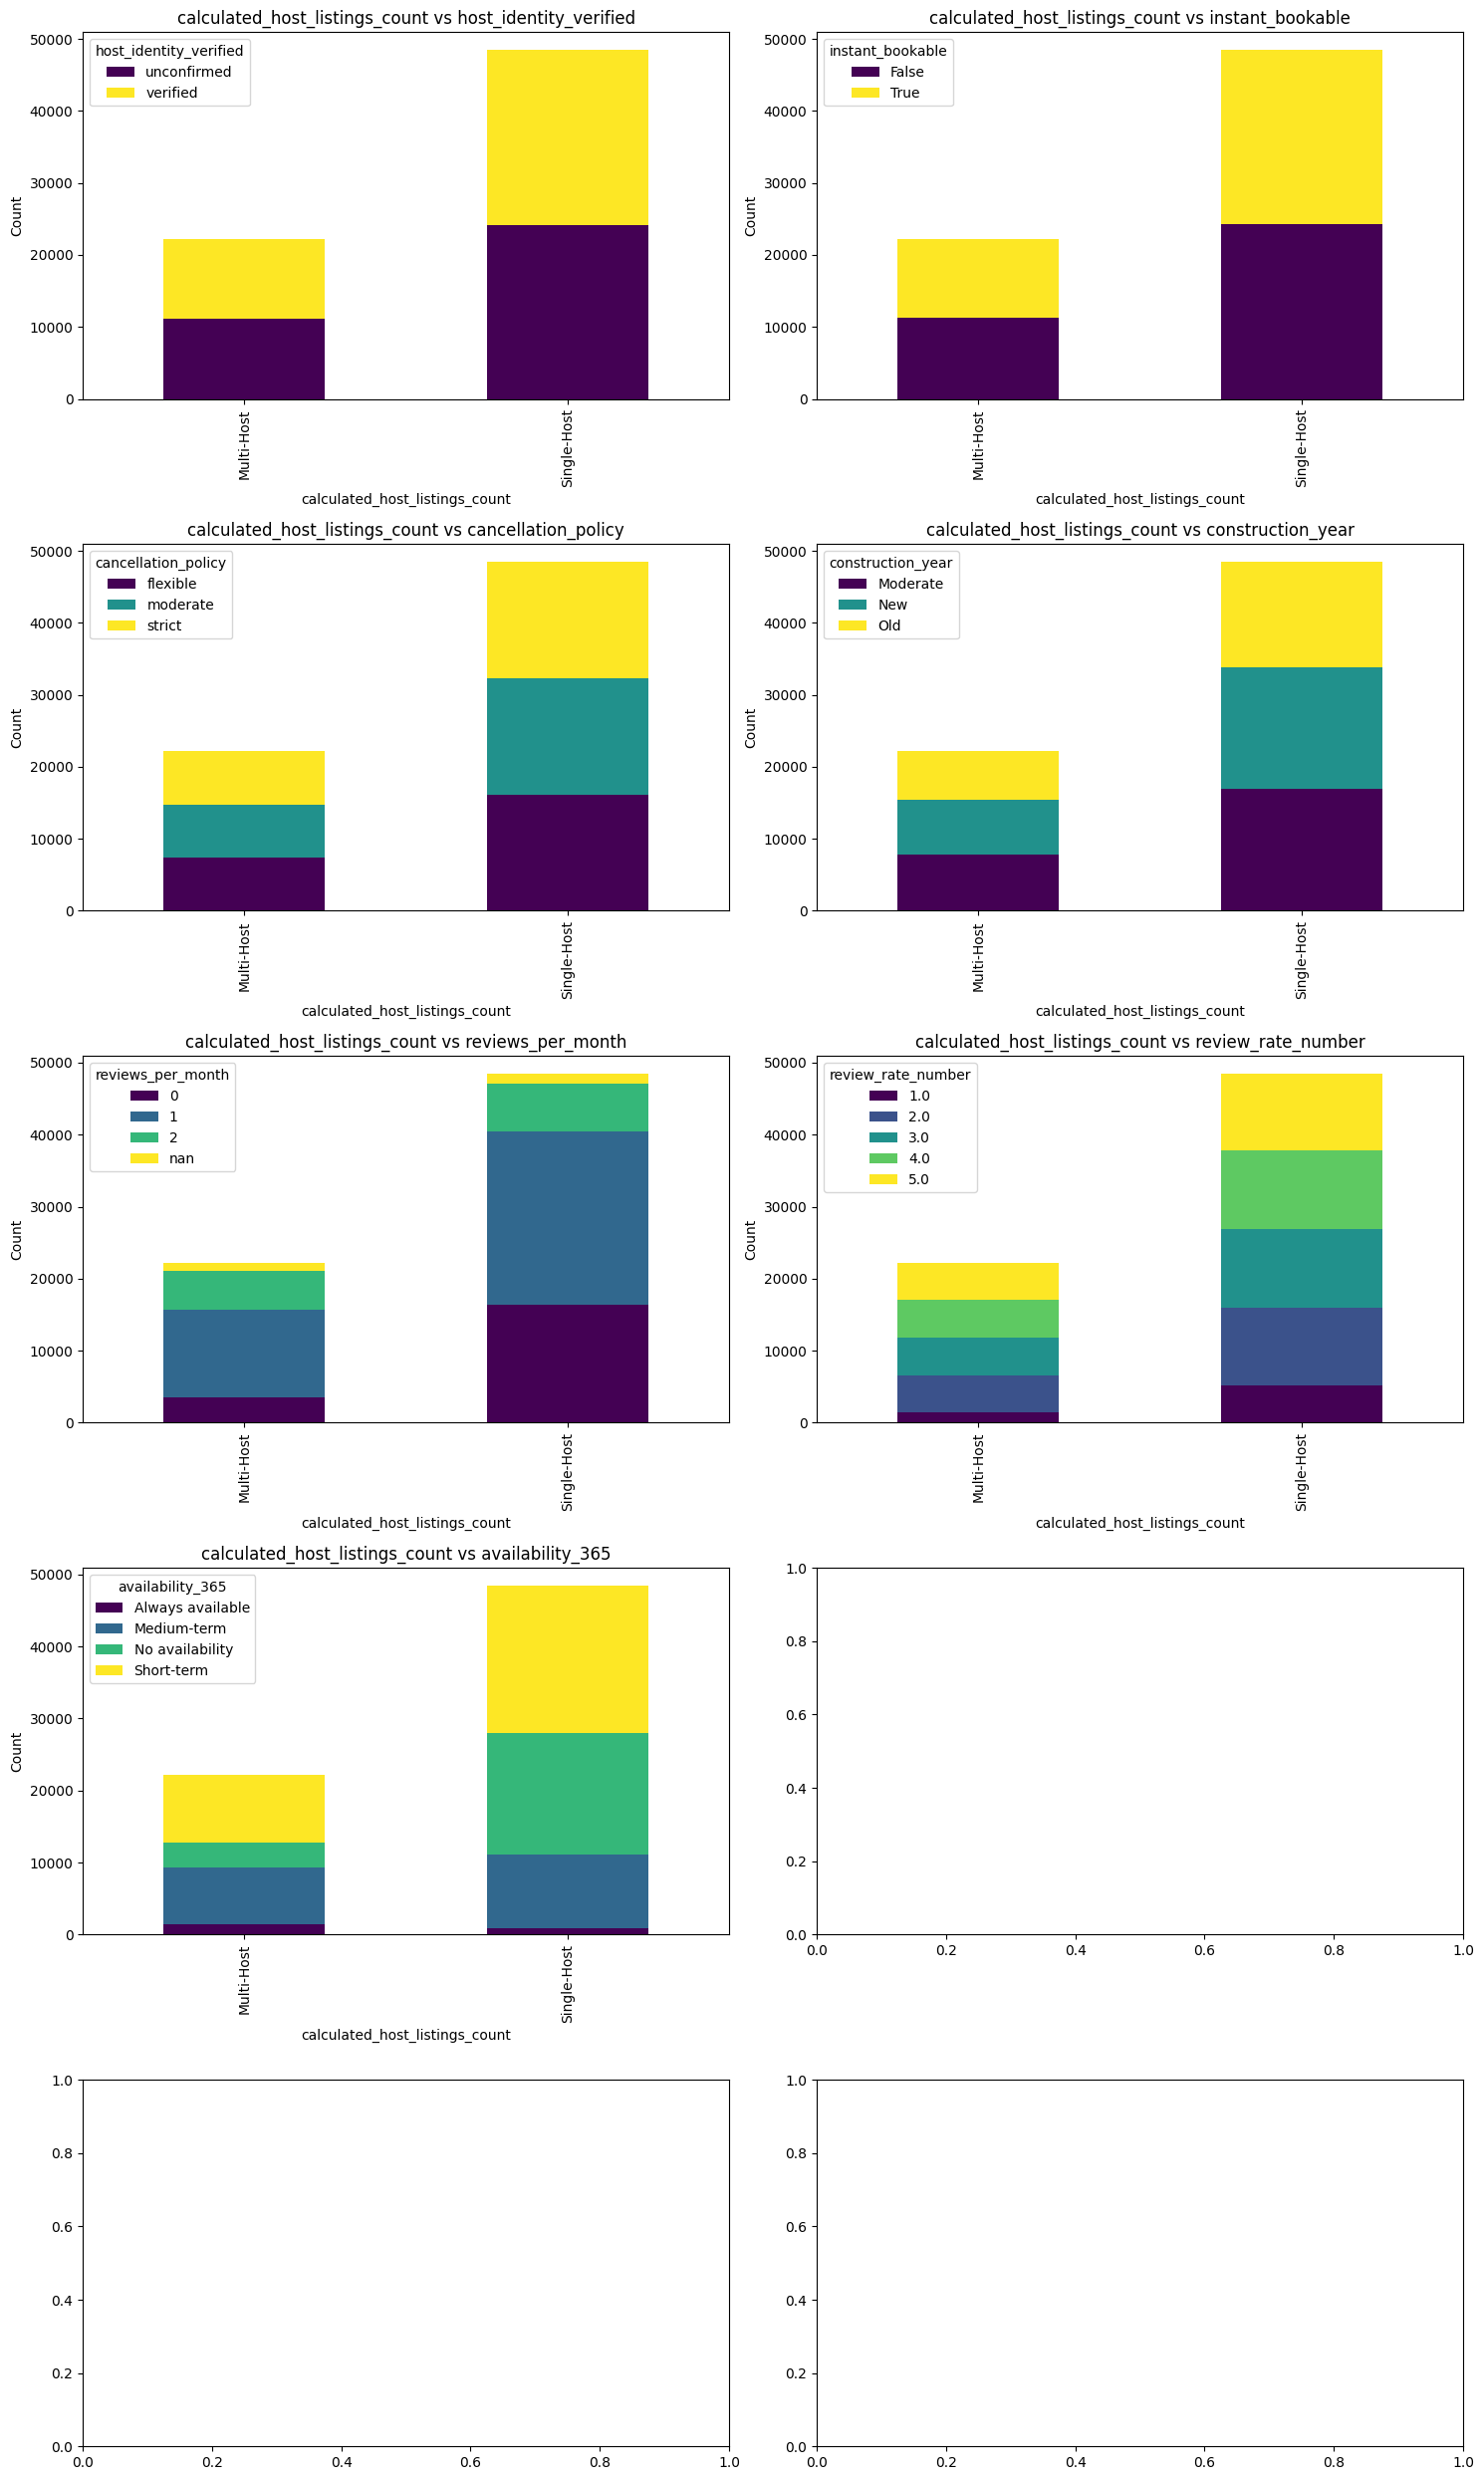

In [231]:
plot_cat('calculated_host_listings_count')

#### Insights

1. **Host Identity Verified vs. Host Listings Count**  
   - Single-host listings dominate the dataset.
   - Unverified hosts make up a significant portion of single-host listings.

2. **Instant Bookable vs. Host Listings Count**  
   - A large number of single-host listings are **not instant bookable**.
   - Multi-host listings tend to offer instant booking more frequently.

3. **Cancellation Policy vs. Host Listings Count**  
   - Flexible cancellation policies are common across both multi-host and single-host listings.
   - Strict policies are more common in single-host listings.

4. **Construction Year vs. Host Listings Count**  
   - Older properties have a substantial share in single-host listings.
   - Moderately aged and new properties are more evenly distributed.

5. **Reviews Per Month vs. Host Listings Count**  
   - A large number of listings **receive zero reviews per month**, especially among single hosts.
   - Some listings receive consistent reviews (1–2 per month).

6. **Review Rate (Score) vs. Host Listings Count**  
   - Most listings have a **review score between 4.0 and 5.0**, regardless of host listing count.
   - Few properties have low ratings (1.0–2.0).

7. **Availability (365 Days) vs. Host Listings Count**  
   - Always-available listings tend to be more common among **single hosts**.
   - Medium-term and short-term availability listings are also present.

Here we end the Cat vs Cat analysis.

##### Num vs Cat